In [1]:
import pandas as pd
import numpy as np
import pyreadstat

pd.options.display.max_columns = None

## Violencia intrafamiliar

In [2]:
data_vif = pd.read_spss('Datasets/principal-encuestas/Final ENVIF 2020 (Muestra Total)_v3.sav')
data_vif.head()

,SbjNum,Date,Duration,pond_total_15_65,pond_region_15_65,pond_total,pond_region,factor_exp,region,reg_rec,comuna,ump,GSE_REC,tipo_id,FechaNac,edad,EDAD_REC,p2,Q_23_S,p2_R,p3,p3_1,p4,p5,T_p6_1,T_p6_2,T_p6_3,p7,p8,p9,p10,p10_1,T_p11_1,T_p11_2,T_p11_3,p12_O1,p12_O2,p12_O3,p12_O4,p12_O5,p12_O6,p12_O7,p12_O8,p12_O9,p12_O10,p13,p14,Q_37_S,p15,p16,p17,p18_O1,p18_O2,p18_O3,p18_O4,p18_O5,p18_O6,p18_O7,p18_O8,p18_O9,p18_O10,p19,p20,N_ED_PPSOS,p21,p22,p23,p24,p25,OCUP_PP_SOS,p26,Q_49_S,p27,p27_REC,T_p28_1,T_p28_2,T_p28_3,AÑOS_REL,T_p29_1,T_p29_2,T_p29_3,CONV_REL,p30,Q_53_S,p30_R,p31_O1,p31_O2,p31_O3,p31_O4,p31_O5,p31_O6,p31_O7,p31_O8,p31_O9,p31_O10,p32,p33,ED_PARE,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,Q_67_S,p45,Q_68_S,p45_R,p46,T_p47_1,T_p47_2,T_p47_3,AÑOS_REL_EX,p48,T_p49_1,T_p49_2,T_p49_3,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60_O1,p60_O2,p60_O3,p60_O4,p60_O5,p60_O6,p60_O7,p60_O8,p60_O9,p60_O10,p60_O11,S_83_8,p61,p62_a_1,p62_b_1_O1,p62_b_1_O2,p62_b_1_O3,p62_b_1_O4,p62_b_1_O5,p62_b_1_O6,p62_c_1,p62_a_2,p62_b_2_O1,p62_b_2_O2,p62_b_2_O3,p62_b_2_O4,p62_b_2_O5,p62_b_2_O6,p62_c_2,p62_a_3,p62_b_3_O1,p62_b_3_O2,p62_b_3_O3,p62_b_3_O4,p62_b_3_O5,p62_b_3_O6,p62_c_3,p62_a_4,p62_b_4_O1,p62_b_4_O2,p62_b_4_O3,p62_b_4_O4,p62_b_4_O5,p62_b_4_O6,p62_c_4,p63_1,Q_97_S,p63_2,Q_98_S,p63_3,Q_99_S,p63_4,Q_100_S,p63_5,Q_101_S,p63_6,Q_102_S,p63_7,Q_103_S,p64_1,p64_2,p64_3,p64_4,p64_5,p64_6,p64_7,p64_8,p64_9,p64_10,p64_11,p64_12,p64_13,p65_1,p65_2,p65_3,p65_4,p65_5,p65_6,Q_122_S,p66,p67,Q_124_S,p68,p69_O1,p69_O2,p69_O3,p69_O4,p69_O5,p69_O6,p69_O7,p69_O8,p69_O9,p69_O10,p69_O11,p69_O12,p69_O13,p69_O14,p69_O15,Q_127,p70_1,p71_1,p72_1,p73_1,p74_1_O1,p74_1_O2,p74_1_O3,p74_1_O4,p74_1_O5,p74_1_O6,p74_1_O7,p74_1_O8,S_132_5,p75_1_O1,p75_1_O2,p75_1_O3,p75_1_O4,p75_1_O5,p75_1_O6,p75_1_O7,p75_1_O8,p75_1_O9,p75_1_O10,p70_2,p71_2,p72_2,p73_2,p74_2_O1,p74_2_O2,p74_2_O3,p74_2_O4,p74_2_O5,p74_2_O6,p74_2_O7,p74_2_O8,S_138_5,p75_2_O1,p75_2_O2,p75_2_O3,p75_2_O4,p75_2_O5,p75_2_O6,p75_2_O7,p75_2_O8,p75_2_O9,p75_2_O10,p70_3,p71_3,p72_3,p73_3,p74_3_O1,p74_3_O2,p74_3_O3,p74_3_O4,p74_3_O5,p74_3_O6,p74_3_O7,p74_3_O8,S_144_5,p75_3_O1,p75_3_O2,p75_3_O3,p75_3_O4,p75_3_O5,p75_3_O6,p75_3_O7,p75_3_O8,p75_3_O9,p75_3_O10,p70_4,p71_4,p72_4,p73_4,p74_4_O1,p74_4_O2,p74_4_O3,p74_4_O4,p74_4_O5,p74_4_O6,p74_4_O7,p74_4_O8,S_150_5,p75_4_O1,p75_4_O2,p75_4_O3,p75_4_O4,p75_4_O5,p75_4_O6,p75_4_O7,p75_4_O8,p75_4_O9,p75_4_O10,p70_5,p71_5,p72_5,p73_5,p74_5_O1,p74_5_O2,p74_5_O3,p74_5_O4,p74_5_O5,p74_5_O6,p74_5_O7,p74_5_O8,S_156_5,p75_5_O1,p75_5_O2,p75_5_O3,p75_5_O4,p75_5_O5,p75_5_O6,p75_5_O7,p75_5_O8,p75_5_O9,p75_5_O10,p70_6,p71_6,p72_6,p73_6,p74_6_O1,p74_6_O2,p74_6_O3,p74_6_O4,p74_6_O5,p74_6_O6,p74_6_O7,p74_6_O8,S_162_5,p75_6_O1,p75_6_O2,p75_6_O3,p75_6_O4,p75_6_O5,p75_6_O6,p75_6_O7,p75_6_O8,p75_6_O9,p75_6_O10,p76,p77,p77_1_O1,p77_1_O2,p77_1_O3,p77_1_O4,p77_1_O5,p77_1_O6,p77_1_O7,p77_1_O8,p77_1_O9,p78,p79,Q_168_S,p80_a,p81_a,p82_a,p83_a,p84_a_O1,p84_a_O2,p84_a_O3,p84_a_O4,p84_a_O5,p84_a_O6,p84_a_O7,p80_b,p81_b,p82_b,p83_b,p84_b_O1,p84_b_O2,p84_b_O3,p84_b_O4,p84_b_O5,p84_b_O6,p84_b_O7,p80_c,p81_c,p82_c,p83_c,p84_c_O1,p84_c_O2,p84_c_O3,p84_c_O4,p84_c_O5,p84_c_O6,p84_c_O7,p80_d,p81_d,p82_d,p83_d,p84_d_O1,p84_d_O2,p84_d_O3,p84_d_O4,p84_d_O5,p84_d_O6,p84_d_O7,p80_e,p81_e,p82_e,p83_e,p84_e_O1,p84_e_O2,p84_e_O3,p84_e_O4,p84_e_O5,p84_e_O6,p84_e_O7,p80_f,p81_f,p82_f,p83_f,p84_f_O1,p84_f_O2,p84_f_O3,p84_f_O4,p84_f_O5,p84_f_O6,p84_f_O7,p85_a,p85_b,p85_c,p85_d,p85_e,p86,p87_O1,p87_O2,p87_O3,p87_O4,p87_O5,p87_O6,p87_O7,p87_O8,p87_O9,p88,p89,p90_1,p91_1,p92_1_O1,p92_1_O2,p92_1_O3,p92_1_O4,p92_1_O5,p92_1_O6,p92_1_O7,p92_1_O8,p92_1_O9,p93_1,p94_1,p95_1,p96_1_O1,p96_1_O2,p96_1_O3,p96_1_O4,p96_1_O5,p96_1_O6,p96_1_O7,p96_1_O8,p96_1_O9,p97_1,p90_2,p91_2,p92_2_O1,p92_2_O2,p92_2_O3,p92_2_O4,p92_2_O5,p92_2_O6,p92_2_O7,p92_2_O8,p92_2_O9,p93_2,p94_2,p95_2,p96_2_O1,p96_2_O2,p96_2_O3,p96_2_O4,p96_2_O5,p96_2_O6,p96_2_O7,p96_2_O8,p96_2_O9,p97_2,p90_3,p91_3,p92_3_O1,p92_3_O2,p92_3_O3,p92_3_O4,p92_3_O5,p92_3_O6,p92_3_O7,p92_3_O8,p92_

In [3]:
cols = ['N_ED_PPSOS', 'OCUP_PP_SOS', 'PVAEP_AÑO', 'PVAEP_14', 'PVAEP_VIDA', 'PVAL_AÑO', 'PVAL_14', 'PVAL_VIDA', 'PVAE_AÑO', 'PVAE_14', 'PVAE_VIDA', 'VPL_AÑO', 'VPG_AÑO', 'VPGEN_AÑO',\
  'VFL_AÑO', 'VFG_AÑO', 'VFGEN_AÑO', 'VS_AÑO_1_a', 'VSGENV_AoV_2', 'PV_AÑO', 'PV_VIDA', 'VE_AÑO', 'VDS_14',\
  'PV_65', 'RVL_AÑO', 'RVG_AÑO', 'IND_DEP_ECON', 'IND_RED_APOYO', 'AÑOS_REL', 'p27_REC', 'ED_PARE', 'CONV_REL', 'AÑOS_REL_EX',\
  'P60_FAMILIA', 'P60_PAREJA_O_EX', 'P60_OTRO', 'AGR_PAREJA_PSI', 'AGR_PAREJA_FIS', 'AGR_PAREJA_GEN', 'reg_rec', 'edad', 'p3', 'p4', 'T_p6_3', 'p7', 'p8', 'p9', 'p10_1', 'T_p11_1',\
  'T_p11_2', 'T_p11_3', 'p14', 'p15', 'p26', 'p27', 'T_p28_1', 'T_p28_2', 'T_p28_3', 'p30', 'p33', 'p34', 'p35', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42',\
  'p44', 'p45', 'T_p47_1', 'T_p47_2', 'T_p47_3', 'p48', 'T_p49_1', 'T_p49_2', 'T_p49_3', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p61',\
  'p62_b_1_O1', 'p62_b_1_O2', 'p62_b_1_O3', 'p62_b_1_O4', 'p62_b_1_O5', 'p62_b_2_O1', 'p62_b_2_O2', 'p62_b_2_O3', 'p62_b_2_O4', 'p62_b_2_O5',\
  'p62_b_3_O1', 'p62_b_3_O2', 'p62_b_3_O3', 'p62_b_3_O4', 'p62_b_3_O5', 'p62_b_4_O1', 'p62_b_4_O2', 'p62_b_4_O3', 'p62_b_4_O4', 'p62_b_4_O5',\
  'p63_1', 'p63_2', 'p63_3', 'p64_1', 'p64_2', 'p64_3', 'p64_4', 'p64_5', 'p64_6', 'p64_7', 'p64_8', 'p64_9', 'p64_10', 'p64_11',\
  'p64_12', 'p64_13', 'p65_1', 'p65_3', 'p65_4', 'p65_5', 'p65_6', 'p148_1', 'p148_2', 'p148_3', 'p148_4', 'p148_5', 'p148_6', 'p148_7', 'p152', 'p153_a_O1', 'EDAD_REC', 'GSE_REC', 'p159', 'T_p160_1']
data_vif = data_vif[cols]

In [4]:
data_vif.info(verbose = 'All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 142 columns):
 #    Column           Dtype   
---   ------           -----   
 0    N_ED_PPSOS       category
 1    OCUP_PP_SOS      category
 2    PVAEP_AÑO        category
 3    PVAEP_14         category
 4    PVAEP_VIDA       category
 5    PVAL_AÑO         category
 6    PVAL_14          category
 7    PVAL_VIDA        category
 8    PVAE_AÑO         category
 9    PVAE_14          category
 10   PVAE_VIDA        category
 11   VPL_AÑO          category
 12   VPG_AÑO          category
 13   VPGEN_AÑO        category
 14   VFL_AÑO          category
 15   VFG_AÑO          category
 16   VFGEN_AÑO        category
 17   VS_AÑO_1_a       category
 18   VSGENV_AoV_2     category
 19   PV_AÑO           category
 20   PV_VIDA          category
 21   VE_AÑO           category
 22   VDS_14           category
 23   PV_65            category
 24   RVL_AÑO          category
 25   RVG_AÑO          categ

In [5]:
data_vif[data_vif.select_dtypes(include=['category']).columns] = data_vif[data_vif.select_dtypes(include=['category']).columns].astype(str)
data_vif.info(verbose = 'All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 142 columns):
 #    Column           Dtype  
---   ------           -----  
 0    N_ED_PPSOS       object 
 1    OCUP_PP_SOS      object 
 2    PVAEP_AÑO        object 
 3    PVAEP_14         object 
 4    PVAEP_VIDA       object 
 5    PVAL_AÑO         object 
 6    PVAL_14          object 
 7    PVAL_VIDA        object 
 8    PVAE_AÑO         object 
 9    PVAE_14          object 
 10   PVAE_VIDA        object 
 11   VPL_AÑO          object 
 12   VPG_AÑO          object 
 13   VPGEN_AÑO        object 
 14   VFL_AÑO          object 
 15   VFG_AÑO          object 
 16   VFGEN_AÑO        object 
 17   VS_AÑO_1_a       object 
 18   VSGENV_AoV_2     object 
 19   PV_AÑO           object 
 20   PV_VIDA          object 
 21   VE_AÑO           object 
 22   VDS_14           object 
 23   PV_65            object 
 24   RVL_AÑO          object 
 25   RVG_AÑO          object 
 26   IND_DEP_ECON     o

In [6]:
try:
    meses_semana = 0.229979
    data_vif['N_ED_PPSOS'] = data_vif['N_ED_PPSOS'].map({'Sin estudios' : 1, 'Pre-Kinder o Kinder' : 2, 'Educación básica o Preparatoria incompleta o inferior' : 3, 'Educación Básica o Preparatoria completa' : 4,
                                                         'Educación Media o Humanidades incompleta' : 5, 'Educación Media o Humanidades completa' : 6,
                                                         'Instituto Profesional o Centros de Formación Técnica incompleta' : 7, 'Instituto Profesional o Centros de Formación Técnica completa' : 8,
                                                         'Universitaria incompleta' : 9,'Universitaria completa': 10, 'Postgrado (máster, doctor o equivalente)' : 11, 'No sabe (no leer)' : 8,
                                                         'No responde (no leer)' : 9})

    data_vif['OCUP_PP_SOS'] = data_vif['OCUP_PP_SOS'].map({'Trabajadores no calificados en ventas y servicios, peones agropecuarios, forestales, construcción, etc.': 1,
                                                         'Obreros, operarios y artesanos de artes mecánicas y de otros oficios.': 2,
                                                         'Trabajadores de los servicios y vendedores de comercio y mercados.': 3,
                                                         'Agricultores y trabajadores calificados agropecuarios y pesqueros.': 4,
                                                         'Operadores de instalaciones y máquinas y montadores / conductores de vehículos.': 5,
                                                         'Empleados de oficina públicos y privados.': 6,
                                                         'Técnicos y profesionales de nivel medio (incluye hasta suboficiales FFAA y Carabineros).': 7,
                                                         'Profesionales, científicos e intelectuales': 8,
                                                         'Alto ejecutivo (gerente general o gerente de área o sector) de empresa privadas o públicas. Director o dueño de grand': 9,
                                                         'Otros grupos no identificados (incluye rentistas, incapacitados, etc.)': 10})

    data_vif['PVAEP_AÑO'] = data_vif['PVAEP_AÑO'].map({'Sufrió violencia en el ámbito espacios públicos en los últimos 12 meses': 1,
                                                       'No Sufrió violencia en el ámbito espacios públicos en los últimos 12 meses': 2})

    data_vif['PVAEP_14'] = data_vif['PVAEP_14'].map({'Sufrió violencia en el ámbito espacios públicos en la niñez' : 1, 
                                                     'No Sufrió violencia en el ámbito espacios públicos en la niñez' : 2})

    data_vif['PVAEP_VIDA'] = data_vif['PVAEP_VIDA'].map({'Sufrió violencia en el ámbito espacios públicos durante su vida' : 1 , 
                                                         'No Sufrió violencia en el ámbito espacios públicos durante su vida' : 2})

    data_vif['PVAL_AÑO'] = data_vif['PVAL_AÑO'].map({'Sufrió violencia en el ámbito laboral en los últimos 12 meses': 1,
                                                    'No Sufrió violencia en el ámbito laboral en los últimos 12 meses': 2,
                                                    'Sin datos': 9,
                                                    'Nunca ha trabajado': 99})

    data_vif['PVAL_14'] = data_vif['PVAL_14'].map({'Sufrió violencia en el ámbito laboral en la niñez': 1,
                                                 'No Sufrió violencia en el ámbito laboral en la niñez': 2,
                                                 'Sin datos': 9,
                                                 'Nunca ha trabajado': 99})


    data_vif['PVAL_VIDA'] = data_vif['PVAL_VIDA'].map({'No Sufrió violencia en el ámbito laboral durante su vida': 2,
                                                     'Sufrió violencia en el ámbito laboral durante su vida': 1,
                                                     'Sin datos': 9,
                                                     'Nunca ha trabajado': 99})

    data_vif['PVAE_AÑO'] = data_vif['PVAE_AÑO'].map({'Sufrió violencia en el ámbito educativo en los últimos 12 meses': 1,
                                                    'No Sufrió violencia en el ámbito educativo en los últimos 12 meses': 2,
                                                    'Sin datos': 9})


    data_vif['PVAE_14'] = data_vif['PVAE_14'].map({'Sufrió violencia en el ámbito educativo en la niñez': 1,
                                                 'No Sufrió violencia en el ámbito educativo en la niñez': 2})


    data_vif['PVAE_VIDA'] = data_vif['PVAE_VIDA'].map({'Sufrió violencia en el ámbito educativo durante su vida': 1,
                                                     'No Sufrió violencia en el ámbito educativo durante su vida': 2,
                                                     'Sin datos': 9})

    data_vif['VPL_AÑO'] = data_vif['VPL_AÑO'].map({'Sufrió violencia psicológica leve en los últimos 12 meses': 1,
     'No sufrió violencia psicológica leve en los últimos 12 meses': 2})


    data_vif['VPG_AÑO'] = data_vif['VPG_AÑO'].map({'Sufrió violencia psicológica grave en los últimos 12 meses': 1,
                                                  'No sufrió violencia psicológica grave en los últimos 12 meses': 2})


    data_vif['VPGEN_AÑO'] = data_vif['VPGEN_AÑO'].map({'Sufrió violencia psicológica general en los últimos 12 meses': 1,
                                                      'No sufrió violencia psicológica general en los últimos 12 meses': 2})

    data_vif['VFL_AÑO'] = data_vif['VFL_AÑO'].map({'Sufrió violencia física leve en los últimos 12 meses': 1,
                                                 'No sufrió violencia física leve en los últimos 12 meses': 2})

    data_vif['VFG_AÑO'] = data_vif['VFG_AÑO'].map({'Sufrió violencia física grave en los últimos 12 meses': 1,
                                    'No sufrió violencia física grave en los últimos 12 meses': 2})

    data_vif['VFGEN_AÑO'] = data_vif['VFGEN_AÑO'].map({'Sufrió violencia física general en los últimos 12 meses': 1,
                                    'No sufrió violencia física general en los últimos 12 meses': 2})

    data_vif['VS_AÑO_1_a'] = data_vif['VS_AÑO_1_a'].map({'Sufrió violencia sexual en los últimos 12 meses': 1,
                                                        'No sufrió violencia sexual en los últimos 12 meses': 2})


    data_vif['PV_AÑO'] = data_vif['PV_AÑO'].map({'Sufrió violencia en los últimos 12 meses': 1,
                                                'No sufrió violencia en los últimos 12 meses': 2})

    data_vif['PV_VIDA'] = data_vif['PV_VIDA'].map({'Sufrió violencia antes o durente los últimos 12 meses': 1,
                                                  'No sufrió violencia antes ni durante los últimos 12 meses': 2})


    data_vif['VE_AÑO'] = data_vif['VE_AÑO'].map({'Sufrió violencia económica en los últimos 12 meses': 1,
                                     'No sufrió violencia económica en los últimos 12 meses': 2,
                                     'Sin Datos': 9,
                                     'nan': np.nan})

    data_vif['VDS_14'] = data_vif['VDS_14'].map({'Sufrió delitos sexuales en niñez': 1,
                                     'No sufrió delitos sexuales en niñez': 2,
                                     'Sin Datos': 9})

    data_vif['PV_65'] = data_vif['PV_65'].map({'Sufrió algún tipo de violencia': 1,
                                             'No sufrió algún tipo de violencia': 2,
                                             'Sin datos': 9})

    data_vif['RVL_AÑO'] = data_vif['RVL_AÑO'].map({'nan': np.nan,
                                         'Tiene una relación de pareja violenta leve durante los últimos 12 meses': 1,
                                         'No tiene una relación de pareja violenta leve durante los últimos 12 meses': 2})

    data_vif['RVG_AÑO'] = data_vif['RVG_AÑO'].map({'Tiene una relación de pareja violenta grave durante los últimos 12 meses': 1,
                                     'No tiene una relación de pareja violenta grave durante los últimos 12 meses': 2,
                                     'nan': np.nan})


    data_vif['IND_DEP_ECON'] = data_vif['IND_DEP_ECON'].map({'Baja dependencia económica': 0,
                                                             'Mediana dependencia económica': 1,
                                                             'Alta dependencia económica': 2,
                                                             'nan': np.nan})

    data_vif['IND_RED_APOYO'] = data_vif['IND_RED_APOYO'].map({'Alto nivel de apoyo': 0,
                                                             'Mediano nivel de apoyo': 1,
                                                             'Bajo nivel de apoyo': 2,
                                                             'nan': np.nan})
    

    data_vif['AÑOS_REL'] = data_vif['AÑOS_REL'].map({'Menos de 1 año de convivencia': 0,
                                                     'Entre 1 y 5 años de convivencia': 1,
                                                     'Entre 6 a 10 años de convivencia': 2,
                                                     'Entre 11 a 20 años de convivencia': 3,
                                                     'Entre 21 y 30 años de convivencia': 4,
                                                     'Mas de 31 años de convivencia': 5,
                                                     'No responde': 9,
                                                     'nan': np.nan})


    data_vif['p27_REC'] = data_vif['p27_REC'].map({'15 a 18 años': 1,
                                                 '19 a 25 años': 2,
                                                 '26 a 35 años': 3,
                                                 '36 a 45 años': 4,
                                                 '46 a 55 años': 5,
                                                 '56 a 65 años': 6,
                                                 '66 años y más': 7,
                                                 'No sabe/No responde': 9,
                                                 'nan': np.nan})

    data_vif['ED_PARE'] = data_vif['ED_PARE'].map({'Sin estudios': 1,
                                                 'Pre-Kinder o Kinder': 2,
                                                 'Educación básica o Preparatoria incompleta o inferior': 3,
                                                 'Educación Básica o Preparatoria completa': 4,
                                                 'Educación Media o Humanidades incompleta': 5,
                                                 'Educación Media o Humanidades completa': 6,
                                                 'Instituto Profesional o Centros de Formación Técnica incompl': 7,
                                                 'Instituto Profesional o Centros de Formación Técnica complet': 8,
                                                 'Universitaria incompleta': 9,
                                                 'Universitaria completa': 10,
                                                 'Postgrado (máster, doctor o equivalente)': 11,
                                                 'No sabe (no leer)': 88,
                                                 'No responde (no leer)': 99,
                                                 'nan': np.nan})



    data_vif['CONV_REL'] = data_vif['CONV_REL'].map({'Mas de 31 años de convivencia': 0,
                                                 'Entre 1 y 5 años de convivencia': 1,
                                                 'Entre 6 a 10 años de convivencia': 2,
                                                 'Entre 11 a 20 años de convivencia': 3,
                                                 'Entre 21 y 30 años de convivencia': 4,
                                                 'Menos de 1 año de convivencia': 5,
                                                 'No responde': 9,
                                                 'nan': np.nan})

    data_vif['AÑOS_REL_EX'] = data_vif['AÑOS_REL_EX'].map({'Menos de 1 año de relación': 0,
                                                         'Entre 1 y 5 años de relación': 1,
                                                         'Entre 6 a 10 años de relación': 2,
                                                         'Entre 11 a 20 años de relación': 3,
                                                         'Entre 21 y 30 años de relación': 4,
                                                         'Mas de 31 años de relación': 5,
                                                         'No responde': 9,
                                                         'nan': np.nan})



    data_vif['P60_FAMILIA'] = data_vif['P60_FAMILIA'].map({'Si': 1, 'No': 2, 'nan': np.nan})

    data_vif['P60_PAREJA_O_EX'] = data_vif['P60_PAREJA_O_EX'].map({'Si': 1, 'No': 2, 'nan': np.nan})

    data_vif['P60_OTRO'] = data_vif['P60_OTRO'].map({'No': 2, 'Si': 1, 'nan': np.nan})

    data_vif['VSGENV_AoV_2'] = data_vif['VSGENV_AoV_2'].map({'Sufrió violencia sexual antes o durante los últimos doce meses': 1,
                                                             'No sufrió violencia sexual antes ni durante los últimos doce meses': 2})
    
    data_vif['p64_2'] = data_vif['p64_2'].map({ 'Muy en desacuerdo' : 1 ,
                                               'En desacuerdo' : 2,
                                               'Indiferente' : 3,
                                               'De acuerdo' : 4,
                                               'Muy de acuerdo' : 5,
                                               'No sabe (no leer)' : 8,
                                               'No responde (no leer)' : 9})


    data_vif.rename(columns = {'N_ED_PPSOS' : 'NIVEL_EDUCACION',
                               'OCUP_PP_SOS' : 'OCUPACION',
                               'PVAEP_AÑO' : 'VIOLENCIA_PUBLICA',
                               'PVAEP_14' : 'VIOLENCIA_PUBLICA_NINEZ',
                               'PVAEP_VIDA':'VILENCIA_PUBLICA_VIDA' ,
                               'PVAL_AÑO' : 'VIOLENCIA_LABORAL_ANIO',
                               'PVAL_14' : 'VIOLENCIA_LABORAL_NINEZ',
                               'PVAL_VIDA' : 'VIOLENCIA_LABORAL_VIDA',
                               'PVAE_AÑO' : 'VIOLENCIA_EDUCATIVO_ANIO',
                               'PVAE_14' : 'VIOLENCIA_EDUCATIVO_NINEZ',
                               'PVAE_VIDA' : 'VIOLENCIA_EDUCATIVO_VIDA', 
                               'VPL_AÑO' : 'VIOLENCIA_PSICOLOGICA_LEVE_ANIO',
                               'VPG_AÑO' : 'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
                               'VPGEN_AÑO' : 'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO',
                               'VFL_AÑO' : 'VIOLENCIA_FISICA_LEVE_ANIO',
                               'VFG_AÑO' : 'VIOLENCIA_FISICA_GRAVE_ANIO',
                               'VFGEN_AÑO' : 'VIOLENCIA_FISICA_GENERAL_ANIO',
                               'VS_AÑO_1_a' : 'VIOLENCIA_SEXUAL_ANIO',
                               'VSGENV_AoV_2': 'VIOLENCIA_SEXUAL_VIDA',
                               'PV_AÑO' : 'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
                               'PV_VIDA' : 'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 
                               'VE_AÑO' : 'VIOLENCIA_ECONOMICA',
                               'VDS_14' : 'DELITOS_SEXUALES_NINEZ', 
                               'PV_65' : 'VIOLENCIA_ADULTEZ',
                               'RVL_AÑO' : 'TIENE_PAREJA_VIOLENTA_LEVE',
                               'RVG_AÑO' : 'TIENE_PAREJA_VIOLENTA_GRAVE',
                               'IND_DEP_ECON' : 'DEPENDENCIA_ECONOMICA',
                               'IND_RED_APOYO' : 'TIPOLOGIA_RED_APOYO', 
                               'AÑOS_REL' : 'TIEMPO_PAREJA_ACT',
                               'p27_REC' : 'EDAD_PAREJA_ACT',
                               'ED_PARE' : 'ESTUDIOS_PAREJA_ACT',
                               'CONV_REL' : 'ANIOS_CONVIVENCIA_PAREJA_ACT',
                               'AÑOS_REL_EX' : 'ANIOS_RELACION_PAREJA_ANT',
                               'P60_FAMILIA' : 'AYUDA_ECONOMICA_FAMILIA',
                               'P60_PAREJA_O_EX' : 'AYUDA_ECONOMICA_PAREJAS',
                               'P60_OTRO' : 'AYUDA_ECONOMICA_OTROS',
                               'p64_2' : 'HOMBRE_DEBE_RESP_GASTOS_HOGAR'}, inplace = True)
        
    #consideramos todo tipo de agreSion dentro de una sola categoria 
    data_vif['agresion'] = data_vif['AGR_PAREJA_FIS'] + data_vif['AGR_PAREJA_GEN'] + data_vif['AGR_PAREJA_PSI']
    data_vif['agresion'].replace(['SiSi'], 1, inplace=True)
    data_vif['agresion'].replace(['SiSiSi'], 1, inplace=True)
    data_vif['agresion'].replace(['nanSiSi'], 1, inplace=True)
    data_vif['agresion'].replace(['NoSiSi'], 1, inplace=True)
    data_vif['agresion'].replace(['SiSinan'], 1, inplace=True)
    data_vif['agresion'].replace(['NoNoNo'], 2, inplace=True)
    data_vif['agresion'].replace(['Nonannan'], 2, inplace=True)
    data_vif['agresion'].replace(['nannanNo'], 2, inplace=True)
    data_vif['agresion'].replace(['No'], 2, inplace=True)
    data_vif['agresion'].replace(['nannannan'], np.nan, inplace=True) # rellenar los vacios con NO 

    data_vif = data_vif.drop(['AGR_PAREJA_PSI',	'AGR_PAREJA_FIS', 'AGR_PAREJA_GEN'], axis=1)


    # deje 0 las pociones que salen como no leer 
    data_vif = data_vif.rename(columns={'p3':'Estado Civil',
                                        'T_p6_3': 'Numero de hijos', 
                                        'p7':'Nivel Educ', 
                                        'p4': 'Convive con pareja', 
                                        'p8': 'Tuvo algun trabajo remunerado',
                                        'p9': 'Trabajo actual',
                                        'p10_1': 'Actualmente Estudia', 
                                        'p14': 'Sexualidad',
                                        'p15': 'Relacion con el sostenedor',
                                        'p26': 'Sexo de la pareja',
                                        'p27': 'Edad de la pareja actual',
                                        'p30': 'Nacionalidad', 
                                        'p33': 'Nivel Educ de la pareja',
                                        'p34': 'Tuvo algun trabajo remunerado la pareja',
                                        'p35': 'Trabajo actual pareja',
                                        'p37': 'Su pareja a sido violenta con otros',
                                        'p38': 'Frecuencia violenta con otros',
                                        'p39': 'Su pareja sufrio abuso en su infancia padres',
                                        'p40': 'Fue testigo de violencia padres',
                                        'p45': 'Nacionalidad de la pareja', 
                                        'p48': 'Convivio con su pareja anterior', 
                                        'p41': 'Su pareja bebe', 
                                        'p42': 'Frecuencia_', 
                                        'p44': 'Sexo la pareja anterior'})

    
    data_vif['Estado Civil'] = data_vif['Estado Civil'].replace({"Soltera": 7,
                                                                 "Divorciada": 5,
                                                                 'Casada': 1, 
                                                                 'Viuda': 6, 
                                                                 'Separada': 4, 
                                                                 'Bajo el acuerdo de unión civil': 2,
                                                                 'Anulada': 3})
    
    data_vif['Convive con pareja'] = data_vif['Convive con pareja'].replace({'nan' : np.nan, 'Si': 1 , 'No' : 2})
    
    data_vif['Sexo de la pareja'] = data_vif['Sexo de la pareja'].replace({'nan' : np.nan, 'Mujer' : 2, 'Hombre' : 1, 'Otro, ¿cuál?' : 3}) 
    
    data_vif['Tuvo algun trabajo remunerado'] = data_vif['Tuvo algun trabajo remunerado'].replace({'nan' : np.nan, 'Si' : 1, 'No' : 2})

    data_vif['Trabajo actual'] = data_vif['Trabajo actual'].replace({"": np.nan,
                                             'nan': np.nan,
                                             'Asalariada del sector privado':3, 
                                             'Empleadora o patrona':1, 
                                             'Trabajadora por cuenta propia':2, 
                                             'Asalariada del sector público': 4,
                                             'Personal del servicio doméstico puertas adentro': 5, 
                                             'Personal del servicio doméstico puertas afuera': 6, 
                                             'Familiar o personal remunerado':7 })

    data_vif['Su pareja a sido violenta con otros'] = data_vif['Su pareja a sido violenta con otros'].replace({'nan' : np.nan, 
                                                                                                               'Si' : 1, 
                                                                                                               'No' : 2,
                                                                                                               'No sabe (no leer)' : 8,
                                                                                                               'No responde (no leer)' : 9})
    
    data_vif['Tuvo algun trabajo remunerado la pareja'] = data_vif['Tuvo algun trabajo remunerado la pareja'].replace({'nan' : np.nan, 'Si' : 1, 'No' : 2})
        
    data_vif['Trabajo actual pareja'] = data_vif['Trabajo actual pareja'].replace({"": np.nan,
                                                "nan": np.nan,
                                               'Asalariado/a del sector privado':3, 
                                               'Empleador/a o patrón/a':1, 
                                               'Trabajador/a por cuenta propia':2, 
                                               'Asalariado/a del sector público': 4,
                                               'Personal del servicio doméstico puertas adentro': 5,
                                               'Personal del servicio doméstico puertas afuera': 6, 
                                               'Familiar o personal remunerado':7 })

    # 8 los que respondieron no en la col 'tuvo algún trabajo remunerado', igual para el de trabajo de la pareja

    data_vif['Nivel Educ'] = data_vif['Nivel Educ'].replace({"Sin estudios": 1,
                                                             'Pre-Kinder o Kinder':2, 
                                                             'Educación básica o Preparatoria incompleta o inferior': 3, 
                                                             'Educación Básica o Preparatoria completa': 4, 
                                                             'Educación Media o Humanidades incompleta':5,
                                                             'Educación Media o Humanidades completa': 6, 
                                                             'Instituto Profesional o Centros de Formación Técnica incompl': 7,
                                                             'Instituto Profesional o Centros de Formación Técnica complet':8,
                                                             'Universitaria incompleta': 9, 'Universitaria completa': 10,
                                                             'Postgrado (máster, doctor o equivalente)': 11, 
                                                             'nan': np.nan})

    data_vif['Nivel Educ de la pareja'] = data_vif['Nivel Educ de la pareja'].replace({"Sin estudios": 1,
                                                                                       'Pre-Kinder o Kinder':2,
                                                                                       'Educación básica o Preparatoria incompleta o inferior': 3, 
                                                                                       'Educación Básica o Preparatoria completa': 4, 
                                                                                       'Educación Media o Humanidades incompleta':5,
                                                                                       'Educación Media o Humanidades completa': 6, 
                                                                                       'Instituto Profesional o Centros de Formación Técnica incompl': 7,
                                                                                       'Instituto Profesional o Centros de Formación Técnica complet':8, 
                                                                                       'Universitaria incompleta': 9, 'Universitaria completa': 10,
                                                                                       'Postgrado (máster, doctor o equivalente)': 11, 
                                                                                       'nan': np.nan})

    #0 quienes tenian " "
    data_vif['Sexualidad'] = data_vif['Sexualidad'].replace({'Heterosexual (atracción hacia el sexo opuesto)': 1, 
                                                             'Gay/lesbiana (atracción hacia el mismo sexo)': 2, 
                                                             'Bisexual (atracción hacia ambos sexos)': 3, 
                                                             'Otra, ¿Cuál?': 4})

    data_vif['Frecuencia violenta con otros'] = data_vif['Frecuencia violenta con otros'].replace({'A veces': 1, 
                                                                                                     'Muchas veces': 2,
                                                                                                     'Siempre': 3, 
                                                                                                     'Otra, ¿Cuál?': 4, 
                                                                                                     'nan': np.nan })
    # 5 si respondio no a la pregunta anterior}
    data_vif['Nacionalidad'] = data_vif['Nacionalidad'].replace({"Chilena": 1,
                                                                 'Peruana':2, 
                                                                 'Colombiana': 3,
                                                                 'Venezolana': 4, 
                                                                 'Boliviana':5, 
                                                                 'Argentina': 6, 
                                                                 'Haitiana': 7, 
                                                                 'Ecuatoriana':8, 
                                                                 'Otro, ¿cuál?': 9, 
                                                                 'nan': np.nan})
    
    data_vif['Nacionalidad de la pareja'] = data_vif['Nacionalidad de la pareja'].replace({"Chilena": 1,
                                                                                           'Peruana':2, 
                                                                                           'Colombiana': 3,
                                                                                           'Venezolana': 4, 
                                                                                           'Boliviana':5, 
                                                                                           'Argentina': 6, 
                                                                                           'Haitiana': 7, 
                                                                                           'Ecuatoriana':8, 
                                                                                           'Otro, ¿cuál?': 9, 
                                                                                           'nan': np.nan})

    #10 a los que no responden 
    data_vif['Su pareja bebe'] = data_vif['Su pareja bebe'].replace({"3 a 6 veces por semana": 1,
                                                                     '1 o 2 veces por semana':2, 
                                                                     '1 vez por semana': 3,
                                                                     'Una vez al mes': 4, 
                                                                     'Menos de una vez al mes':5, 
                                                                     'No bebe': 6, 
                                                                     'nan': np.nan})
    
    data_vif['Convivio con su pareja anterior'] = data_vif['Convivio con su pareja anterior'].replace({'nan' : np.nan,
                                                                                                     'Si' : 1,
                                                                                                     'No' : 2})
    
    
    #los datos vacios los deje como 7 
    data_vif['Sexo la pareja anterior'] = data_vif['Sexo la pareja anterior'].replace({'nan' : np.nan, 'Mujer' : 2, 'Hombre' : 1, 'Otro, ¿cuál?' : 3})
    
    #tienen muchos datos vacios, no se si sea util 
    data_vif['Relacion con el sostenedor'] = data_vif['Relacion con el sostenedor'].replace({"Yo soy la principal sostenedora del hogar": 1,
                                                                                             'Cónyuge':2, 
                                                                                             'Conviviente': 3, 
                                                                                             'Hija': 4, 'Hijastra':5,
                                                                                             'Nuera': 6, 
                                                                                             'Nieta': 7, 
                                                                                             'Hermana, cuñada':8, 
                                                                                             'Padres': 9, 
                                                                                             'Suegros': 10, 
                                                                                             'Otro/a pariente': 11,
                                                                                             'No pariente': 12})
    data_vif['T_p11_1'] =  data_vif['T_p11_1'] *  meses_semana
    data_vif['T_p28_1'] =  data_vif['T_p28_1'] *  meses_semana
    data_vif['T_p47_1'] =  data_vif['T_p47_1'] *  meses_semana
    data_vif['T_p49_1'] =  data_vif['T_p49_1'] *  meses_semana
    
    data_vif['T_p11_3'] =  data_vif['T_p11_3'] *  12
    data_vif['T_p28_3'] =  data_vif['T_p28_3'] *  12
    data_vif['T_p47_3'] =  data_vif['T_p47_3'] *  12
    data_vif['T_p49_3'] =  data_vif['T_p49_3'] *  12
    
    data_vif['MESES_SIN_TRABAJO'] = data_vif[['T_p11_1', 'T_p11_2', 'T_p11_3']].sum(axis = 1)
    data_vif['MESES_PAREJA_ACTUAL'] = data_vif[['T_p28_1', 'T_p28_2', 'T_p28_3']].sum(axis = 1)
    data_vif['MESES_EX_PAREJA'] = data_vif[['T_p47_1', 'T_p47_2', 'T_p47_3']].sum(axis = 1)
    data_vif['MESES_CONVIVENCIA_EX_PAREJA'] = data_vif[['T_p49_1', 'T_p49_2', 'T_p49_3']].sum(axis = 1)
    
    data_vif['MESES_SIN_TRABAJO'] = data_vif['MESES_SIN_TRABAJO'].round()
    data_vif['MESES_PAREJA_ACTUAL'] = data_vif['MESES_PAREJA_ACTUAL'].round()
    data_vif['MESES_EX_PAREJA'] = data_vif['MESES_EX_PAREJA'].round()
    data_vif['MESES_CONVIVENCIA_EX_PAREJA'] = data_vif['MESES_CONVIVENCIA_EX_PAREJA'].round()
    
    data_vif['MESES_SIN_TRABAJO'] = data_vif['MESES_SIN_TRABAJO'].astype(int)
    data_vif['MESES_PAREJA_ACTUAL'] = data_vif['MESES_PAREJA_ACTUAL'].astype(int)
    data_vif['MESES_EX_PAREJA'] = data_vif['MESES_EX_PAREJA'].astype(int)
    data_vif['MESES_CONVIVENCIA_EX_PAREJA'] = data_vif['MESES_CONVIVENCIA_EX_PAREJA'].astype(int)

    
    data_vif.drop(columns = ['T_p49_1', 'T_p49_2', 'T_p49_3', 'T_p11_1', 'T_p11_2', 'T_p11_3', 'T_p28_1', 'T_p28_2', 'T_p28_3',
                            'T_p47_1', 'T_p47_2', 'T_p47_3'], inplace = True)
    
    
    data_vif.p64_3.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_3":"Mujer_acargo_hijos"},inplace=True)
    
    data_vif.p64_4.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_4":"Mujer_realizar_quehaceres"},inplace=True)
    
    data_vif.p64_5.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_5":"Mujer_no_contra_op"},inplace=True)
    
    data_vif.p64_6.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_6":"Mujer_part_sinaprob"},inplace=True)
    
    data_vif.p64_7.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_7":"Mujer_escoger_amigos"},inplace=True)
    
    data_vif.p64_8.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_8":"Vest_aprobada"},inplace=True)
    
    data_vif.p64_9.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_9":"Relaciones_obligada"},inplace=True)
    
    data_vif.p64_10.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_10":"Vestirse_x_no_acoso"},inplace=True)
    
    data_vif.p64_11.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_11":"Maltrato_x_bien_familia"},inplace=True)
    
    data_vif.p64_12.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_12":"Maltrato_se_resuelve_en_casa"},inplace=True)
    
    data_vif.p64_13.replace(["Muy en desacuerdo","En desacuerdo","Indiferente","De acuerdo","Muy de acuerdo","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"p64_13":"Maltrato_x_infidelidad"},inplace=True)
    
    data_vif.p65_1.replace(["Nunca","Al menos una vez al año","Al menos una vez al mes","Al menos una vez por semana","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6], inplace=True)
    data_vif.rename(columns={"p65_1":"Frec_comu_fam"},inplace=True)
    
    data_vif.p65_3.replace(["Nunca","Al menos una vez al año","Al menos una vez al mes","Al menos una vez por semana","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6], inplace=True)
    data_vif.rename(columns={"p65_3":"Frec_comu_amigos"},inplace=True)
    
    data_vif.p65_4.replace(["Nunca","Al menos una vez al año","Al menos una vez al mes","Al menos una vez por semana","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6], inplace=True)
    data_vif.rename(columns={"p65_4":"Frec_comu_vecinos"},inplace=True)
    
    data_vif.p65_5.replace(["Nunca","Al menos una vez al año","Al menos una vez al mes","Al menos una vez por semana","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6], inplace=True)
    data_vif.rename(columns={"p65_5":"Frec_comu_religiosa"},inplace=True)
    
    data_vif.p65_6.replace(["Nunca","Al menos una vez al año","Al menos una vez al mes","Al menos una vez por semana","No sabe (no leer)",
                      "No responde (no leer)"],[1,2,3,4,5,6], inplace=True)
    data_vif.rename(columns={"p65_6":"Frec_comu_otros"},inplace=True)
    
    data_vif.p148_1.replace(["Nunca","Sólo una vez","Algunas veces al año","Algunas veces al mes","Todos los días","NO APLICA","No Sabe (No leer)",
                      "No Responde (No leer)","nan"],[1,2,3,4,5,6,7,8,np.nan], inplace=True)
    data_vif.rename(columns={"p148_1":"El_niega_dinero_hogar"},inplace=True)
    
    data_vif.p148_2.replace(["Nunca","Sólo una vez","Algunas veces al año","Algunas veces al mes","Todos los días","NO APLICA","No Sabe (No leer)",
                      "No Responde (No leer)","nan"],[1,2,3,4,5,6,7,8,np.nan], inplace=True)
    data_vif.rename(columns={"p148_2":"Reprocha_vivir_de_su_dinero"},inplace=True)
    
    data_vif.p148_3.replace(["Nunca","Sólo una vez","Algunas veces al año","Algunas veces al mes","Todos los días","NO APLICA","No Sabe (No leer)",
                      "No Responde (No leer)","nan"],[1,2,3,4,5,6,7,8,np.nan], inplace=True)
    data_vif.rename(columns={"p148_3":"No_decidir_gastos"},inplace=True)
    
    data_vif.p148_4.replace(["Nunca","Sólo una vez","Algunas veces al año","Algunas veces al mes","Todos los días","NO APLICA","No Sabe (No leer)",
                      "No Responde (No leer)","nan"],[1,2,3,4,5,6,7,8,np.nan], inplace=True)
    data_vif.rename(columns={"p148_4":"No_manejo_dinero"},inplace=True)
    
    data_vif.p148_5.replace(["Nunca","Sólo una vez","Algunas veces al año","Algunas veces al mes","Todos los días","NO APLICA","No Sabe (No leer)",
                      "No Responde (No leer)","nan"],[1,2,3,4,5,6,7,8,np.nan], inplace=True)
    data_vif.rename(columns={"p148_5":"Prohibe_trabajar"},inplace=True)
    
    data_vif.p148_6.replace(["Nunca","Sólo una vez","Algunas veces al año","Algunas veces al mes","Todos los días","NO APLICA","No Sabe (No leer)",
                      "No Responde (No leer)","nan"],[1,2,3,4,5,6,7,8,np.nan], inplace=True)
    data_vif.rename(columns={"p148_6":"Tomado_su_dinero"},inplace=True)
    
    data_vif.p148_7.replace(["Nunca","Sólo una vez","Algunas veces al año","Algunas veces al mes","Todos los días","NO APLICA","No Sabe (No leer)",
                      "No Responde (No leer)","nan"],[1,2,3,4,5,6,7,8, np.nan], inplace=True)
    data_vif.rename(columns={"p148_7":"Endeudado_contra_voluntad"},inplace=True)
    
    data_vif.p152.replace(["Si","No","No sabe (no leer)","No responde (no leer)"],
                      [1,2,3,4], inplace=True)
    data_vif.rename(columns={"p152":"Abusos_sexual_fami"},inplace=True)
    
    data_vif.GSE_REC.replace(["Alto","Medio","Bajo","Sin datos suficientes"],
                      [1,2,3,4], inplace=True)
    data_vif.rename(columns={"GSE_REC":"Grupo_socioeconomico"},inplace=True)
    
    data_vif.rename(columns={"p159":"Personas_en_hogar"},inplace=True)
    data_vif.rename(columns={"T_p160_1":"Adultos_en_hogar"},inplace=True)
    data_vif.EDAD_REC.replace(["15 a 18 años","19 a 25 años","26 a 35 años","36 a 45 años","46 a 55 años","56 a 65 años","66 años y más"],
                      [1,2,3,4,5,6,7], inplace=True)
    data_vif.rename(columns={"EDAD_REC":"Rango_etario"},inplace=True)
    
    data_vif.p153_a_O1.replace(["Padre","Padrastro - Pareja de la madre","Madre","Madrastra - Pareja del padre","Tío","Tía",
                         "Otro miembro de la familia (hombre)","Otro miembro de la familia (mujer)","Pololo/a","nan"],
                          [1,2,3,4,5,6,7,8,9,np.nan], inplace=True)
    data_vif.rename(columns={"p153_a_O1":"Familiar_que_abuso"},inplace=True)

    data_vif['Su pareja sufrio abuso en su infancia padres'] = data_vif['Su pareja sufrio abuso en su infancia padres'].replace({'Si' : 1,
                                                                    'No' : 2,
                                                                    'No aplica (no hubo figuras paternas-maternas)': 3,
                                                                    'No sabe (no leer)' : 88,
                                                                    'No responde (no leer)' : 99,
                                                                    'nan': np.nan })
    
    data_vif['Fue testigo de violencia padres'] = data_vif['Fue testigo de violencia padres'].replace({'Si' : 1,
                                                                                                            'No' : 2,
                                                                                                            'No aplica (no hubo figuras paternas-maternas)': 3,
                                                                                                            'No sabe (no leer)' : 88,
                                                                                                            'No responde (no leer)' : 99,
                                                                                                            'nan': np.nan })
    
    data_vif['Frecuencia_'] = data_vif['Frecuencia_'].replace({'Nunca': 1, 'Al menos una vez por mes': 2,
                                                            'A menos una vez por semana': 3,
                                                            'Todos o casi todos los días': 4, 'nan': np.nan})
    
    data_vif['reg_rec'] = data_vif['reg_rec'].replace({'Región de Tarapacá': 1,
                                                        'Región de Antofagasta': 2,
                                                        'Región de Atacama': 3,
                                                        'Región de Coquimbo': 4, 
                                                        'Región de Valparaíso': 5,
                                                        'Región del Lib. Gral. Bdo. O´Higgins': 6,
                                                        'Región del Lib. Gral. Bdo. O´Higgins': 6,
                                                        'Región del Maule': 7,
                                                        'Región del Bío Bío': 8 , 
                                                        'Región de la Araucanía': 9,
                                                        'Región de Los Lagos': 10, 
                                                        'Región de Aysén': 11 ,
                                                        'Región de Magallanes': 12,
                                                        'Región Metropolitana': 13,
                                                        'Región de Los Ríos': 14,
                                                        'Región de Arica y Parinacota': 15,
                                                        'Región del Ñuble': 16})
    
    dic = {'Sin estudios':1,
            'Pre-Kinder o Kinder':2,
            'Educación básica o Preparatoria incompleta o inferior':3,
            'Educación Básica o Preparatoria completa':4,
            'Educación Media o Humanidades incompleta':5,
            'Educación Media o Humanidades completa':6,
            'Instituto Profesional o Centros de Formación Técnica incompl':7,
            'Instituto Profesional o Centros de Formación Técnica complet':8,
            'Universitaria incompleta':9,
            'Universitaria completa':10,
            'Postgrado (máster, doctor o equivalente)':11,
            'No sabe (no leer)':88,
            'No responde (no leer)':99,
            'Salida':9999,
            'nan': np.nan}
    
    data_vif['p50'] = data_vif['p50'].replace(dic)
    replaces = {"Si" : 1,
                "No" : 2,
                'nan':np.nan}

    
    dic_2 = {'Si' : 1,
            'No' : 2, 
            'No sabe (no leer)' : 8,
            'No responde (no leer)':9,'nan':np.nan}
    data_vif['p51'] = data_vif['p51'].replace(dic_2)

    dic_3 = {'A veces':1,
             'Muchas veces': 2,
             'Siempre':3,
             'No sabe (no leer)' : 8,
             'No responde (no leer)':9,
             'nan': np.nan}
    data_vif['p52'] = data_vif['p52'].replace(dic_3)

    dic_4 = {'Si':1,
            'No': 2,
            'No aplica (no hubo figuras paternas-maternas)':3,
            'No sabe (no leer)' : 8,
            'No responde (no leer)':9,'nan':np.nan}
    data_vif['p53'] = data_vif['p53'].replace(dic_4)
    data_vif['p54'] = data_vif['p54'].replace(dic_4)

    dic_6 = {'3 a 6 veces por semana':1,
            '1 o 2 veces por semana': 2,
            '1 vez por semana':3,
             'Una vez al mes':4,
            'Menos de una vez al mes':5,
             'No aplica':6,
            'No sabe (no leer)' : 8,
             'No responde (no leer)':9,
             'nan':np.nan}
    data_vif['p55'] = data_vif['p55'].replace(dic_6)

    dic_7 = {'Nunca':1,
            'Al menos una vez por mes': 2,
            'A menos una vez por semana':3,
            'Todos o casi todos los días':4,
            'No sabe (no leer)' : 8,
             'No responde (no leer)':9,
             'nan':np.nan}
    data_vif['p56'] = data_vif['p56'].replace(dic_7)

    dic_8 = {'Si':1,
             'No': 2,
             'No sabe (no leer)' : 8,
             'No responde (no leer)':9,
             'nan': np.nan}


    data_vif['p58'] = data_vif['p58'].replace(dic_8)
    data_vif['p59'] = data_vif['p59'].replace(dic_8)
    data_vif['p61'] = data_vif['p61'].replace(dic_8)

    dic_ses = {"Si": 1, "No": 2,  'nan': np.nan}

    #p62_b_1_0X
    data_vif['p62_b_1_O1'] = data_vif['p62_b_1_O1'].replace(dic_ses)
    data_vif['p62_b_1_O2'] = data_vif['p62_b_1_O2'].replace(dic_ses)
    data_vif['p62_b_1_O3'] = data_vif['p62_b_1_O3'].replace(dic_ses)
    data_vif['p62_b_1_O4'] = data_vif['p62_b_1_O4'].replace(dic_ses)
    data_vif['p62_b_1_O5'] = data_vif['p62_b_1_O5'].replace(dic_ses)

    #p62_b_2_0X
    data_vif['p62_b_2_O1'] = data_vif['p62_b_2_O1'].replace(dic_ses)
    data_vif['p62_b_2_O2'] = data_vif['p62_b_2_O2'].replace(dic_ses)
    data_vif['p62_b_2_O3'] = data_vif['p62_b_2_O3'].replace(dic_ses)
    data_vif['p62_b_2_O4'] = data_vif['p62_b_2_O4'].replace(dic_ses)
    data_vif['p62_b_2_O5'] = data_vif['p62_b_2_O5'].replace(dic_ses)

    #p62_b_3_0X
    data_vif['p62_b_3_O1'] = data_vif['p62_b_3_O1'].replace(dic_ses)
    data_vif['p62_b_3_O2'] = data_vif['p62_b_3_O2'].replace(dic_ses)
    data_vif['p62_b_3_O3'] = data_vif['p62_b_3_O3'].replace(dic_ses)
    data_vif['p62_b_3_O4'] = data_vif['p62_b_3_O4'].replace(dic_ses)
    data_vif['p62_b_3_O5'] = data_vif['p62_b_3_O5'].replace(dic_ses)

    #p62_b_4_0X
    data_vif['p62_b_4_O1'] = data_vif['p62_b_4_O1'].replace(dic_ses)
    data_vif['p62_b_4_O2'] = data_vif['p62_b_4_O2'].replace(dic_ses)
    data_vif['p62_b_4_O3'] = data_vif['p62_b_4_O3'].replace(dic_ses)
    data_vif['p62_b_4_O4'] = data_vif['p62_b_4_O4'].replace(dic_ses)
    data_vif['p62_b_4_O5'] = data_vif['p62_b_4_O5'].replace(dic_ses)


    dic_9 = {'Decide Ud.':1,
            'Decide su pareja':2,
            'Deciden por mutuo acuerdo':3,
            'Deciden otros miembros ¿Quién o quiénes?':4,
            'No aplica':6,
             "No sabe":8,
             "No responde":9,
             'nan':np.nan}

    data_vif['p63_1'] = data_vif['p63_1'].replace(dic_9)
    data_vif['p63_2'] = data_vif['p63_2'].replace(dic_9)
    data_vif['p63_3'] = data_vif['p63_3'].replace(dic_9)

    dic_10 = {'Muy en desacuerdo':1,
              'En desacuerdo':2,
              'Indiferente':3,
              'De acuerdo':4,'Muy de acuerdo':5,
              'No sabe (no leer)' : 8,
              'No responde (no leer)':9,
              'nan':np.nan}

    data_vif['p64_1'] = data_vif['p64_1'].replace(dic_10)

    data_vif.rename(columns={"p48":"convivir_pareja_ant",
                             'p50': 'niv_educ_pajera_ant',
                             'p51':'agresion_otras_personas_pareja_ant',
                             'p52':'frec_agresion_otras_personas_pareja_ant',
                             'p53':"agresion_padres_pareja_ant",
                             'p54':"presencio_agresion_madre_pareja_ant",
                             'p55': "consumo_alcohol_ultimos_doce_meses_pareja_ant",
                             "p56":"frec_consumo_alcohol_ultimos_doce_meses_pareja_ant",
                             "p57":"frec_ebrio_pareja_ant",
                             "p58":"genera_ingresos_propios",
                             "p59":"apoyo_econonomico",
                             "p61":"dispone_dinero_gastos_personales", 
                             'p62_b_1_O1':"terreno_a_nombre_ella",
                             'p62_b_1_O2':"terreno_a_nombre_pareja",
                             'p62_b_1_O3':"terreno_a_nombre_pareja_ant",
                             'p62_b_1_O4':"terrno_a_nombre_no_sabe",
                             'p62_b_1_O5':'terreno_a_nombre_no_responde',
                             'p62_b_2_O1':"auto_a_nombre_ella",     
                             'p62_b_2_O2':"auto_a_nombre_pareja",
                             'p62_b_2_O3':"auto_a_nombre_pareja_ant", 
                             'p62_b_2_O4':"auto_a_nombre_no_sabe", 
                             'p62_b_2_O5':"auto_a_nombre_no_responde", 
                             'p62_b_3_O1':"vivienda_a_nombre_ella",
                             'p62_b_3_O2':"vivienda_a_nombre_pareja", 
                             'p62_b_3_O3':"vivienda_a_nombre_pareja_ant", 
                             'p62_b_3_O4':"vivienda_a_nombre_no_sabe", 
                             'p62_b_3_O5':"vivienda_a_nombre_no_responde",
                             'p62_b_4_O1':'ahorros_a_nombre_ella', 
                             'p62_b_4_O2':'ahorros_a_nombre_pareja', 
                             'p62_b_4_O3':'ahorros_a_nombre_pareja_ant', 
                             'p62_b_4_O4':'ahorros_a_nombre_no_sabe',
                             'p62_b_4_O5':'ahorros_a_nombre_no_sabe', 
                             'p63_1':"decision_quien_trabaja",
                             'p63_2':"decision_quien_estudia", 
                             'p63_3':"decision_dispone_dinero", 
                             'p64_1':"afirma_hombre_jefe"},inplace=True)
   

    
    data_vif = data_vif.replace({"Si": 1,
                                 'No':2,
                                 'No sabe (no leer)': 8, 
                                 'No sabe (No leer)':8 ,
                                 'No responde (no leer)':9,
                                 'No responde (No leer)':9, 
                                 'No sabe (no sabe)': 8,
                                 'No responde (no responde)' : 9,
                                 'Hombre': 1,
                                 'Mujer': 2})
    
    data_vif.columns = [(i.upper()).replace(' ', '_') for i in data_vif.columns.values]
    
    print('Proceso terminado')
    display(data_vif.head())
except:
    print("El Proceso ya ha sido ejecutado antes")
    display(data_vif.head())

/var/folders/m8/rrjvw12x62dgvb0cqxdx19180000gn/T/ipykernel_31228/2898580177.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_vif['agresion'] = data_vif['AGR_PAREJA_FIS'] + data_vif['AGR_PAREJA_GEN'] + data_vif['AGR_PAREJA_PSI']


Proceso terminado


,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VILENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,VIOLENCIA_EDUCATIVO_VIDA,VIOLENCIA_PSICOLOGICA_LEVE_ANIO,VIOLENCIA_PSICOLOGICA_GRAVE_ANIO,VIOLENCIA_PSICOLOGICA_GENERAL_ANIO,VIOLENCIA_FISICA_LEVE_ANIO,VIOLENCIA_FISICA_GRAVE_ANIO,VIOLENCIA_FISICA_GENERAL_ANIO,VIOLENCIA_SEXUAL_ANIO,VIOLENCIA_SEXUAL_VIDA,VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO,VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA,VIOLENCIA_ECONOMICA,DELITOS_SEXUALES_NINEZ,VIOLENCIA_ADULTEZ,TIENE_PAREJA_VIOLENTA_LEVE,TIENE_PAREJA_VIOLENTA_GRAVE,DEPENDENCIA_ECONOMICA,TIPOLOGIA_RED_APOYO,TIEMPO_PAREJA_ACT,EDAD_PAREJA_ACT,ESTUDIOS_PAREJA_ACT,ANIOS_CONVIVENCIA_PAREJA_ACT,ANIOS_RELACION_PAREJA_ANT,AYUDA_ECONOMICA_FAMILIA,AYUDA_ECONOMICA_PAREJAS,AYUDA_ECONOMICA_OTROS,REG_REC,EDAD,ESTADO_CIVIL,CONVIVE_CON_PAREJA,NUMERO_DE_HIJOS,NIVEL_EDUC,TUVO_ALGUN_TRABAJO_REMUNERADO,TRABAJO_ACTUAL,ACTUALMENTE_ESTUDIA,SEXUALIDAD,RELACION_CON_EL_SOSTENEDOR,SEXO_DE_LA_PAREJA,EDAD_DE_LA_PAREJA_ACTUAL,NACIONALIDAD,NIVEL_EDUC_DE_LA_PAREJA,TUVO_ALGUN_TRABAJO_REMUNERADO_LA_PAREJA,TRABAJO_ACTUAL_PAREJA,SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS,FRECUENCIA_VIOLENTA_CON_OTROS,SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES,FUE_TESTIGO_DE_VIOLENCIA_PADRES,SU_PAREJA_BEBE,FRECUENCIA_,SEXO_LA_PAREJA_ANTERIOR,NACIONALIDAD_DE_LA_PAREJA,CONVIVIO_CON_SU_PAREJA_ANTERIOR,NIV_EDUC_PAJERA_ANT,AGRESION_OTRAS_PERSONAS_PAREJA_ANT,FREC_AGRESION_OTRAS_PERSONAS_PAREJA_ANT,AGRESION_PADRES_PAREJA_ANT,PRESENCIO_AGRESION_MADRE_PAREJA_ANT,CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT,FREC_CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT,FREC_EBRIO_PAREJA_ANT,GENERA_INGRESOS_PROPIOS,APOYO_ECONONOMICO,DISPONE_DINERO_GASTOS_PERSONALES,TERRENO_A_NOMBRE_ELLA,TERRENO_A_NOMBRE_PAREJA,TERRENO_A_NOMBRE_PAREJA_ANT,TERRNO_A_NOMBRE_NO_SABE,TERRENO_A_NOMBRE_NO_RESPONDE,AUTO_A_NOMBRE_ELLA,AUTO_A_NOMBRE_PAREJA,AUTO_A_NOMBRE_PAREJA_ANT,AUTO_A_NOMBRE_NO_SABE,AUTO_A_NOMBRE_NO_RESPONDE,VIVIENDA_A_NOMBRE_ELLA,VIVIENDA_A_NOMBRE_PAREJA,VIVIENDA_A_NOMBRE_PAREJA_ANT,VIVIENDA_A_NOMBRE_NO_SABE,VIVIENDA_A_NOMBRE_NO_RESPONDE,AHORROS_A_NOMBRE_ELLA,AHORROS_A_NOMBRE_PAREJA,AHORROS_A_NOMBRE_PAREJA_ANT,AHORROS_A_NOMBRE_NO_SABE,AHORROS_A_NOMBRE_NO_SABE,DECISION_QUIEN_TRABAJA,DECISION_QUIEN_ESTUDIA,DECISION_DISPONE_DINERO,AFIRMA_HOMBRE_JEFE,HOMBRE_DEBE_RESP_GASTOS_HOGAR,MUJER_ACARGO_HIJOS,MUJER_REALIZAR_QUEHACERES,MUJER_NO_CONTRA_OP,MUJER_PART_SINAPROB,MUJER_ESCOGER_AMIGOS,VEST_APROBADA,RELACIONES_OBLIGADA,VESTIRSE_X_NO_ACOSO,MALTRATO_X_BIEN_FAMILIA,MALTRATO_SE_RESUELVE_EN_CASA,MALTRATO_X_INFIDELIDAD,FREC_COMU_FAM,FREC_COMU_AMIGOS,FREC_COMU_VECINOS,FREC_COMU_RELIGIOSA,FREC_COMU_OTROS,EL_NIEGA_DINERO_HOGAR,REPROCHA_VIVIR_DE_SU_DINERO,NO_DECIDIR_GASTOS,NO_MANEJO_DINERO,PROHIBE_TRABAJAR,TOMADO_SU_DINERO,ENDEUDADO_CONTRA_VOLUNTAD,ABUSOS_SEXUAL_FAMI,FAMILIAR_QUE_ABUSO,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION,MESES_SIN_TRABAJO,MESES_PAREJA_ACTUAL,MESES_EX_PAREJA,MESES_CONVIVENCIA_EX_PAREJA
0,10,6,1,1,1,2,2,2,2,2,1,1,2,1,2,2,2,1,1.0,1,1,NaN,2,2,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,16,32.0,7,NaN,0.0,10,1,3.0,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1,1,1,2,2,2,2,2,4,1,1,1,1,1,1,1,4,4,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,2,3.0,1.0,1.0,0,0,0,0
1,6,10,2,2,2,99,99,99,2,2,2,2,2,2,2,2,2,1,1.0,1,1,2.0,2,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,2.0,2.0,1.0,7,41.0,7,NaN,0.0,1,2,NaN,2,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,88.0,1.0,8.0,8.0,8.0,8.0,NaN,NaN,8,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,8,4,4,4,4,1,4,5,4,4,4,1,4,4,4,1,1,1,1,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2,NaN,4,3,5.0,3.0,NaN,0,0,8,0
2,6,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,1.0,1,1,2.0,2,2,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,Na

In [7]:
try:
    data_vif.dropna(subset=["VIOLENCIA_SEXUAL_VIDA"], inplace = True)
    data_vif.dropna(subset=['VIOLENCIA_ECONOMICA'], inplace = True)
    data_vif.dropna(subset=['DEPENDENCIA_ECONOMICA'], inplace = True)
    data_vif.dropna(subset=['TIPOLOGIA_RED_APOYO'], inplace = True)
    
    # borramos ahorros ya que anteriormente vimos que mas del 80% eran nulos
    data_vif.drop(columns = ['TIENE_PAREJA_VIOLENTA_LEVE',
                            'TIENE_PAREJA_VIOLENTA_GRAVE',
                            'ANIOS_CONVIVENCIA_PAREJA_ACT',
                            'ANIOS_RELACION_PAREJA_ANT',
                            'AYUDA_ECONOMICA_FAMILIA',
                            'AYUDA_ECONOMICA_PAREJAS',
                            'AYUDA_ECONOMICA_OTROS', 
                            'FAMILIAR_QUE_ABUSO',
                            'TRABAJO_ACTUAL', 'NIVEL_EDUC_DE_LA_PAREJA',
                            'TUVO_ALGUN_TRABAJO_REMUNERADO_LA_PAREJA',
                            'TRABAJO_ACTUAL_PAREJA',
                            'FRECUENCIA_VIOLENTA_CON_OTROS',
                            'FRECUENCIA_',
                            'AHORROS_A_NOMBRE_ELLA',
                            'AHORROS_A_NOMBRE_PAREJA',
                            'AHORROS_A_NOMBRE_PAREJA_ANT',
                            'AHORROS_A_NOMBRE_NO_SABE',
                            'AHORROS_A_NOMBRE_NO_SABE'], inplace = True)

    ver_nan = data_vif[['NIV_EDUC_PAJERA_ANT',
                        'AGRESION_OTRAS_PERSONAS_PAREJA_ANT',
                        'FREC_AGRESION_OTRAS_PERSONAS_PAREJA_ANT',
                        'AGRESION_PADRES_PAREJA_ANT',
                        'PRESENCIO_AGRESION_MADRE_PAREJA_ANT',
                        'CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT',
                        'FREC_CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT',
                        'FREC_EBRIO_PAREJA_ANT',
                        'GENERA_INGRESOS_PROPIOS',
                        'APOYO_ECONONOMICO',
                        'DISPONE_DINERO_GASTOS_PERSONALES',
                        'TERRENO_A_NOMBRE_ELLA',
                        'TERRENO_A_NOMBRE_PAREJA',
                        'TERRENO_A_NOMBRE_PAREJA_ANT',
                        'TERRNO_A_NOMBRE_NO_SABE',
                        'TERRENO_A_NOMBRE_NO_RESPONDE',
                        'AUTO_A_NOMBRE_ELLA',
                        'AUTO_A_NOMBRE_PAREJA',
                        'AUTO_A_NOMBRE_PAREJA_ANT',
                        'AUTO_A_NOMBRE_NO_SABE',
                        'AUTO_A_NOMBRE_NO_RESPONDE',
                        'VIVIENDA_A_NOMBRE_ELLA',
                        'VIVIENDA_A_NOMBRE_PAREJA',
                        'VIVIENDA_A_NOMBRE_PAREJA_ANT',
                        'VIVIENDA_A_NOMBRE_NO_SABE',
                        'VIVIENDA_A_NOMBRE_NO_RESPONDE',
                        'DECISION_QUIEN_TRABAJA',
                        'DECISION_QUIEN_ESTUDIA',
                        'DECISION_DISPONE_DINERO',
                        'AFIRMA_HOMBRE_JEFE']]

    # data con cantidad de nan
    count_nan_data_vif = ver_nan.isna().sum(axis=0).reset_index().T[1:]
    count_nan_data_vif.columns = ver_nan.columns

    # vemos las columnas restantes y borramos las con mayor o igual a 4000 nulos
    borrar_2 = []
    for columnas in count_nan_data_vif.columns:
        if int(data_vif[columnas].isna().sum()) >= 4000:
            borrar_2.append(columnas)

    data_vif.drop(columns = borrar_2,inplace = True)

    CAMBIAR = ['NIV_EDUC_PAJERA_ANT',
                'AGRESION_OTRAS_PERSONAS_PAREJA_ANT',
                'AGRESION_PADRES_PAREJA_ANT',
                'PRESENCIO_AGRESION_MADRE_PAREJA_ANT',
                'CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT',
                'GENERA_INGRESOS_PROPIOS',
                'APOYO_ECONONOMICO',
                'DISPONE_DINERO_GASTOS_PERSONALES',
                'VIVIENDA_A_NOMBRE_ELLA',
                'VIVIENDA_A_NOMBRE_PAREJA',
                'VIVIENDA_A_NOMBRE_PAREJA_ANT',
                'VIVIENDA_A_NOMBRE_NO_SABE',
                'VIVIENDA_A_NOMBRE_NO_RESPONDE',
                'DECISION_QUIEN_TRABAJA',
                'DECISION_QUIEN_ESTUDIA',
                'DECISION_DISPONE_DINERO',
                'AFIRMA_HOMBRE_JEFE']

    for cambio in CAMBIAR:
        data_vif[cambio].fillna(9, inplace= True)
        
    data_vif.TIEMPO_PAREJA_ACT = data_vif.TIEMPO_PAREJA_ACT.fillna(9)
    data_vif.EDAD_PAREJA_ACT = data_vif.EDAD_PAREJA_ACT.fillna(9)
    data_vif.ESTUDIOS_PAREJA_ACT = data_vif.ESTUDIOS_PAREJA_ACT.fillna(9)
    data_vif.CONVIVE_CON_PAREJA = data_vif.CONVIVE_CON_PAREJA.fillna(9)
    data_vif.SEXO_DE_LA_PAREJA = data_vif.SEXO_DE_LA_PAREJA.fillna(9)
    data_vif.EDAD_DE_LA_PAREJA_ACTUAL = data_vif.EDAD_DE_LA_PAREJA_ACTUAL.fillna(9)
    data_vif.NACIONALIDAD = data_vif.NACIONALIDAD.fillna(9)
    data_vif.SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS = data_vif.SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS.fillna(9)
    data_vif.SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES = data_vif.SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES.fillna(9)
    data_vif.FUE_TESTIGO_DE_VIOLENCIA_PADRES = data_vif.FUE_TESTIGO_DE_VIOLENCIA_PADRES.fillna(9)
    data_vif.SU_PAREJA_BEBE = data_vif.SU_PAREJA_BEBE.fillna(9)
    data_vif.SEXO_LA_PAREJA_ANTERIOR = data_vif.SEXO_LA_PAREJA_ANTERIOR.fillna(9)
    data_vif.EL_NIEGA_DINERO_HOGAR=data_vif.EL_NIEGA_DINERO_HOGAR.fillna(8)
    data_vif.REPROCHA_VIVIR_DE_SU_DINERO=data_vif.REPROCHA_VIVIR_DE_SU_DINERO.fillna(8)
    data_vif.NO_DECIDIR_GASTOS=data_vif.NO_DECIDIR_GASTOS.fillna(8)
    data_vif.NO_MANEJO_DINERO=data_vif.NO_MANEJO_DINERO.fillna(8)
    data_vif.PROHIBE_TRABAJAR=data_vif.PROHIBE_TRABAJAR.fillna(8)
    data_vif.TOMADO_SU_DINERO=data_vif.TOMADO_SU_DINERO.fillna(8)
    data_vif.ENDEUDADO_CONTRA_VOLUNTAD=data_vif.ENDEUDADO_CONTRA_VOLUNTAD.fillna(8)
    data_vif.NACIONALIDAD_DE_LA_PAREJA.fillna(9, inplace= True)
    data_vif.CONVIVIO_CON_SU_PAREJA_ANTERIOR.fillna(9, inplace= True)
    data_vif.AGRESION.fillna(9, inplace= True)
    
    print('Proceso terminado')
    display(data_vif.head())        
except:
    print("El proceso ya ha sido ejecutado antes")
    display(data_vif.head())

Proceso terminado


,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VILENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,VIOLENCIA_EDUCATIVO_VIDA,VIOLENCIA_PSICOLOGICA_LEVE_ANIO,VIOLENCIA_PSICOLOGICA_GRAVE_ANIO,VIOLENCIA_PSICOLOGICA_GENERAL_ANIO,VIOLENCIA_FISICA_LEVE_ANIO,VIOLENCIA_FISICA_GRAVE_ANIO,VIOLENCIA_FISICA_GENERAL_ANIO,VIOLENCIA_SEXUAL_ANIO,VIOLENCIA_SEXUAL_VIDA,VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO,VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA,VIOLENCIA_ECONOMICA,DELITOS_SEXUALES_NINEZ,VIOLENCIA_ADULTEZ,DEPENDENCIA_ECONOMICA,TIPOLOGIA_RED_APOYO,TIEMPO_PAREJA_ACT,EDAD_PAREJA_ACT,ESTUDIOS_PAREJA_ACT,REG_REC,EDAD,ESTADO_CIVIL,CONVIVE_CON_PAREJA,NUMERO_DE_HIJOS,NIVEL_EDUC,TUVO_ALGUN_TRABAJO_REMUNERADO,ACTUALMENTE_ESTUDIA,SEXUALIDAD,RELACION_CON_EL_SOSTENEDOR,SEXO_DE_LA_PAREJA,EDAD_DE_LA_PAREJA_ACTUAL,NACIONALIDAD,SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS,SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES,FUE_TESTIGO_DE_VIOLENCIA_PADRES,SU_PAREJA_BEBE,SEXO_LA_PAREJA_ANTERIOR,NACIONALIDAD_DE_LA_PAREJA,CONVIVIO_CON_SU_PAREJA_ANTERIOR,NIV_EDUC_PAJERA_ANT,AGRESION_OTRAS_PERSONAS_PAREJA_ANT,AGRESION_PADRES_PAREJA_ANT,PRESENCIO_AGRESION_MADRE_PAREJA_ANT,CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT,GENERA_INGRESOS_PROPIOS,APOYO_ECONONOMICO,DISPONE_DINERO_GASTOS_PERSONALES,VIVIENDA_A_NOMBRE_ELLA,VIVIENDA_A_NOMBRE_PAREJA,VIVIENDA_A_NOMBRE_PAREJA_ANT,VIVIENDA_A_NOMBRE_NO_SABE,VIVIENDA_A_NOMBRE_NO_RESPONDE,DECISION_QUIEN_TRABAJA,DECISION_QUIEN_ESTUDIA,DECISION_DISPONE_DINERO,AFIRMA_HOMBRE_JEFE,HOMBRE_DEBE_RESP_GASTOS_HOGAR,MUJER_ACARGO_HIJOS,MUJER_REALIZAR_QUEHACERES,MUJER_NO_CONTRA_OP,MUJER_PART_SINAPROB,MUJER_ESCOGER_AMIGOS,VEST_APROBADA,RELACIONES_OBLIGADA,VESTIRSE_X_NO_ACOSO,MALTRATO_X_BIEN_FAMILIA,MALTRATO_SE_RESUELVE_EN_CASA,MALTRATO_X_INFIDELIDAD,FREC_COMU_FAM,FREC_COMU_AMIGOS,FREC_COMU_VECINOS,FREC_COMU_RELIGIOSA,FREC_COMU_OTROS,EL_NIEGA_DINERO_HOGAR,REPROCHA_VIVIR_DE_SU_DINERO,NO_DECIDIR_GASTOS,NO_MANEJO_DINERO,PROHIBE_TRABAJAR,TOMADO_SU_DINERO,ENDEUDADO_CONTRA_VOLUNTAD,ABUSOS_SEXUAL_FAMI,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION,MESES_SIN_TRABAJO,MESES_PAREJA_ACTUAL,MESES_EX_PAREJA,MESES_CONVIVENCIA_EX_PAREJA
2,6,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,1.0,1,1,2.0,2,2,0.0,1.0,9.0,9.0,9.0,6,45.0,5,9.0,0.0,6,1,2,1,1,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,1,2,1,9.0,9.0,9.0,9.0,9.0,1,1,1,1,2,2,1,1,5,4,1,1,1,1,1,2,3,1,4,1,1,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2,4,3,7.0,7.0,1.0,0,0,144,144
3,6,3,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,1,1.0,1,1,1.0,2,2,1.0,1.0,9.0,9.0,9.0,15,22.0,7,9.0,0.0,10,2,2,1,4,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,8.0,2.0,1.0,8.0,8.0,1,2,1,9.0,9.0,9.0,9.0,9.0,4,4,4,3,4,4,1,2,5,4,2,2,2,2,4,2,4,4,4,1,4,4.0,3.0,1.0,1.0,1.0,1.0,1.0,2,2,3,4.0,2.0,1.0,1,0,66,66
4,3,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1.0,1,1,2.0,1,2,1.0,1.0,9.0,9.0,9.0,7,25.0,7,9.0,0.0,4,2,2,1,4,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,1.0,1.0,88.0,1.0,2.0,2.0,4.0,1,1,1,9.0,9.0,9.0,9.0,9.0,6,6,6,2,2,2,2,2,2,2,2,2,2,2,2,2,4,1,4,1,1,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1,2,3,2.0,2.0,9.0,1,0,12,12
6,11,8,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,1,2.0,1,2,0.0,0.0,9.0,9.0,9.0,4,38.0,7,9.0,0.0,11,1,2,1,1,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,2.0,6.0,1.0,1.0,1.0,6.0,1,2,1,9.0,9.0,9.0,9.0,9.0,3,3,1,1,1,2,3,1,5,4,1,1,1,1,2,1,4,4,3,1,3,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1,4,1,2.0,2.0,9.0,0,0,36,0
10,8,10,2,2,2,1,2,1,2,2,2,1,2,1,2,2,2,2,1.0,1,1,2.0,2,2,0.0,1.0,9.0,9.0,9.0,13,31.0,7,9.0,0.0,11,1,1,1,4,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,10.0,2.0,1.0,2.0,3.0,1,2,1,1.0,2.0,2.0,2.0,2.0,3,3,1,1,3,1,1,1,5,5,1,1,1,1,4,1,4,4,3,3,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,3,3,3.0,3.0,1.0,0,0,36,36


In [8]:
data_vif[(data_vif.VIOLENCIA_PUBLICA != 2) & (data_vif.VIOLENCIA_PUBLICA_NINEZ != 2) & (data_vif.VILENCIA_PUBLICA_VIDA != 2)]

,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VILENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,VIOLENCIA_EDUCATIVO_VIDA,VIOLENCIA_PSICOLOGICA_LEVE_ANIO,VIOLENCIA_PSICOLOGICA_GRAVE_ANIO,VIOLENCIA_PSICOLOGICA_GENERAL_ANIO,VIOLENCIA_FISICA_LEVE_ANIO,VIOLENCIA_FISICA_GRAVE_ANIO,VIOLENCIA_FISICA_GENERAL_ANIO,VIOLENCIA_SEXUAL_ANIO,VIOLENCIA_SEXUAL_VIDA,VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO,VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA,VIOLENCIA_ECONOMICA,DELITOS_SEXUALES_NINEZ,VIOLENCIA_ADULTEZ,DEPENDENCIA_ECONOMICA,TIPOLOGIA_RED_APOYO,TIEMPO_PAREJA_ACT,EDAD_PAREJA_ACT,ESTUDIOS_PAREJA_ACT,REG_REC,EDAD,ESTADO_CIVIL,CONVIVE_CON_PAREJA,NUMERO_DE_HIJOS,NIVEL_EDUC,TUVO_ALGUN_TRABAJO_REMUNERADO,ACTUALMENTE_ESTUDIA,SEXUALIDAD,RELACION_CON_EL_SOSTENEDOR,SEXO_DE_LA_PAREJA,EDAD_DE_LA_PAREJA_ACTUAL,NACIONALIDAD,SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS,SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES,FUE_TESTIGO_DE_VIOLENCIA_PADRES,SU_PAREJA_BEBE,SEXO_LA_PAREJA_ANTERIOR,NACIONALIDAD_DE_LA_PAREJA,CONVIVIO_CON_SU_PAREJA_ANTERIOR,NIV_EDUC_PAJERA_ANT,AGRESION_OTRAS_PERSONAS_PAREJA_ANT,AGRESION_PADRES_PAREJA_ANT,PRESENCIO_AGRESION_MADRE_PAREJA_ANT,CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT,GENERA_INGRESOS_PROPIOS,APOYO_ECONONOMICO,DISPONE_DINERO_GASTOS_PERSONALES,VIVIENDA_A_NOMBRE_ELLA,VIVIENDA_A_NOMBRE_PAREJA,VIVIENDA_A_NOMBRE_PAREJA_ANT,VIVIENDA_A_NOMBRE_NO_SABE,VIVIENDA_A_NOMBRE_NO_RESPONDE,DECISION_QUIEN_TRABAJA,DECISION_QUIEN_ESTUDIA,DECISION_DISPONE_DINERO,AFIRMA_HOMBRE_JEFE,HOMBRE_DEBE_RESP_GASTOS_HOGAR,MUJER_ACARGO_HIJOS,MUJER_REALIZAR_QUEHACERES,MUJER_NO_CONTRA_OP,MUJER_PART_SINAPROB,MUJER_ESCOGER_AMIGOS,VEST_APROBADA,RELACIONES_OBLIGADA,VESTIRSE_X_NO_ACOSO,MALTRATO_X_BIEN_FAMILIA,MALTRATO_SE_RESUELVE_EN_CASA,MALTRATO_X_INFIDELIDAD,FREC_COMU_FAM,FREC_COMU_AMIGOS,FREC_COMU_VECINOS,FREC_COMU_RELIGIOSA,FREC_COMU_OTROS,EL_NIEGA_DINERO_HOGAR,REPROCHA_VIVIR_DE_SU_DINERO,NO_DECIDIR_GASTOS,NO_MANEJO_DINERO,PROHIBE_TRABAJAR,TOMADO_SU_DINERO,ENDEUDADO_CONTRA_VOLUNTAD,ABUSOS_SEXUAL_FAMI,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION,MESES_SIN_TRABAJO,MESES_PAREJA_ACTUAL,MESES_EX_PAREJA,MESES_CONVIVENCIA_EX_PAREJA
11,8,6,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1.0,2,1,2.0,2,2,0.0,0.0,9.0,9.0,9.0,13,30.0,7,9.0,2.0,9,1,2,1,4,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1,1,1,9.0,9.0,9.0,9.0,9.0,4,1,1,2,2,2,2,2,4,4,2,2,2,2,2,2,4,4,4,4,4,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2,3,3,6.0,4.0,9.0,0,0,44,72
21,8,7,1,1,1,1,2,1,2,2,2,1,1,1,2,2,2,1,1.0,1,1,1.0,1,2,1.0,2.0,9.0,9.0,9.0,13,23.0,7,9.0,0.0,6,2,1,1,11,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,2.0,7.0,1.0,1.0,2.0,2.0,1,1,1,9.0,9.0,9.0,9.0,9.0,1,3,3,2,2,2,2,2,4,4,2,2,2,2,4,2,4,4,3,1,1,4.0,3.0,1.0,1.0,1.0,3.0,1.0,1,2,2,4.0,4.0,1.0,132,0,18,0
23,6,2,1,1,1,1,2,1,2,1,1,1,1,1,1,2,1,1,1.0,1,1,1.0,2,2,1.0,0.0,9.0,9.0,9.0,3,21.0,7,9.0,1.0,7,2,2,1,4,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,1.0,1.0,6.0,2.0,1.0,1.0,3.0,1,2,1,9.0,9.0,9.0,9.0,9.0,4,3,1,1,1,1,1,2,5,5,1,1,1,1,1,1,4,4,3,1,3,4.0,6.0,6.0,6.0,6.0,1.0,3.0,2,2,3,4.0,2.0,1.0,19,0,220,220
33,9,2,1,1,1,2,2,2,2,1,1,1,1,1,1,2,1,1,1.0,1,1,1.0,1,2,2.0,1.0,9.0,9.0,9.0,8,30.0,1,9.0,0.0,9,2,2,1,1,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,4.0,1,1,2,9.0,9.0,9.0,9.0,9.0,1,1,1,2,4,2,2,2,4,4,2,2,2,1,2,2,4,2,4,3,1,2.0,4.0,1.0,1.0,1.0,1.0,2.0,1,3,3,4.0,1.0,1.0,84,0,204,84
52,5,3,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,2,2.0,1,1,2.0,1,2,2.0,1.0,9.0,9.0,9.0,8,19.0,7,9.0,0.0,6,2,1,1,12,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,2.0,8.0,1.0,1.0,1.0,1.0,2,1,2,9.0,9.0,9.0,9.0,9.0,6,6,6,1,1,1,1,1,5,5,1,1,1,1,1,1,4,4,4,1,4,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1,2,3,4.0,3.0,1.0,12,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Cantidad de columnas con vacias

In [9]:
count_nan_data_vif = data_vif.isna().sum(axis=0).reset_index().T[1:]
count_nan_data_vif.columns = data_vif.columns
count_nan_data_vif

,NIVEL_EDUCACION,OCUPACION,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VILENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,VIOLENCIA_EDUCATIVO_VIDA,VIOLENCIA_PSICOLOGICA_LEVE_ANIO,VIOLENCIA_PSICOLOGICA_GRAVE_ANIO,VIOLENCIA_PSICOLOGICA_GENERAL_ANIO,VIOLENCIA_FISICA_LEVE_ANIO,VIOLENCIA_FISICA_GRAVE_ANIO,VIOLENCIA_FISICA_GENERAL_ANIO,VIOLENCIA_SEXUAL_ANIO,VIOLENCIA_SEXUAL_VIDA,VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO,VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA,VIOLENCIA_ECONOMICA,DELITOS_SEXUALES_NINEZ,VIOLENCIA_ADULTEZ,DEPENDENCIA_ECONOMICA,TIPOLOGIA_RED_APOYO,TIEMPO_PAREJA_ACT,EDAD_PAREJA_ACT,ESTUDIOS_PAREJA_ACT,REG_REC,EDAD,ESTADO_CIVIL,CONVIVE_CON_PAREJA,NUMERO_DE_HIJOS,NIVEL_EDUC,TUVO_ALGUN_TRABAJO_REMUNERADO,ACTUALMENTE_ESTUDIA,SEXUALIDAD,RELACION_CON_EL_SOSTENEDOR,SEXO_DE_LA_PAREJA,EDAD_DE_LA_PAREJA_ACTUAL,NACIONALIDAD,SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS,SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES,FUE_TESTIGO_DE_VIOLENCIA_PADRES,SU_PAREJA_BEBE,SEXO_LA_PAREJA_ANTERIOR,NACIONALIDAD_DE_LA_PAREJA,CONVIVIO_CON_SU_PAREJA_ANTERIOR,NIV_EDUC_PAJERA_ANT,AGRESION_OTRAS_PERSONAS_PAREJA_ANT,AGRESION_PADRES_PAREJA_ANT,PRESENCIO_AGRESION_MADRE_PAREJA_ANT,CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT,GENERA_INGRESOS_PROPIOS,APOYO_ECONONOMICO,DISPONE_DINERO_GASTOS_PERSONALES,VIVIENDA_A_NOMBRE_ELLA,VIVIENDA_A_NOMBRE_PAREJA,VIVIENDA_A_NOMBRE_PAREJA_ANT,VIVIENDA_A_NOMBRE_NO_SABE,VIVIENDA_A_NOMBRE_NO_RESPONDE,DECISION_QUIEN_TRABAJA,DECISION_QUIEN_ESTUDIA,DECISION_DISPONE_DINERO,AFIRMA_HOMBRE_JEFE,HOMBRE_DEBE_RESP_GASTOS_HOGAR,MUJER_ACARGO_HIJOS,MUJER_REALIZAR_QUEHACERES,MUJER_NO_CONTRA_OP,MUJER_PART_SINAPROB,MUJER_ESCOGER_AMIGOS,VEST_APROBADA,RELACIONES_OBLIGADA,VESTIRSE_X_NO_ACOSO,MALTRATO_X_BIEN_FAMILIA,MALTRATO_SE_RESUELVE_EN_CASA,MALTRATO_X_INFIDELIDAD,FREC_COMU_FAM,FREC_COMU_AMIGOS,FREC_COMU_VECINOS,FREC_COMU_RELIGIOSA,FREC_COMU_OTROS,EL_NIEGA_DINERO_HOGAR,REPROCHA_VIVIR_DE_SU_DINERO,NO_DECIDIR_GASTOS,NO_MANEJO_DINERO,PROHIBE_TRABAJAR,TOMADO_SU_DINERO,ENDEUDADO_CONTRA_VOLUNTAD,ABUSOS_SEXUAL_FAMI,RANGO_ETARIO,GRUPO_SOCIOECONOMICO,PERSONAS_EN_HOGAR,ADULTOS_EN_HOGAR,AGRESION,MESES_SIN_TRABAJO,MESES_PAREJA_ACTUAL,MESES_EX_PAREJA,MESES_CONVIVENCIA_EX_PAREJA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Verificamos la correcta asignación categorica, tratamiento y conversiones de variables

In [10]:
for col in data_vif:
    print(f'{col} : {list(data_vif[col].unique())} \n')


NIVEL_EDUCACION : [6, 3, 11, 8, 4, 9, 5, 10, 7, 1, 2] 

OCUPACION : [1, 3, 2, 8, 10, 6, 7, 5, 9, 4] 

VIOLENCIA_PUBLICA : [2, 1] 

VIOLENCIA_PUBLICA_NINEZ : [2, 1] 

VILENCIA_PUBLICA_VIDA : [1, 2] 

VIOLENCIA_LABORAL_ANIO : [2, 1, 99, 9] 

VIOLENCIA_LABORAL_NINEZ : [2, 1, 99, 9] 

VIOLENCIA_LABORAL_VIDA : [2, 1, 99, 9] 

VIOLENCIA_EDUCATIVO_ANIO : [2, 1, 9] 

VIOLENCIA_EDUCATIVO_NINEZ : [2, 1] 

VIOLENCIA_EDUCATIVO_VIDA : [2, 1, 9] 

VIOLENCIA_PSICOLOGICA_LEVE_ANIO : [2, 1] 

VIOLENCIA_PSICOLOGICA_GRAVE_ANIO : [2, 1] 

VIOLENCIA_PSICOLOGICA_GENERAL_ANIO : [2, 1] 

VIOLENCIA_FISICA_LEVE_ANIO : [2, 1] 

VIOLENCIA_FISICA_GRAVE_ANIO : [1, 2] 

VIOLENCIA_FISICA_GENERAL_ANIO : [1, 2] 

VIOLENCIA_SEXUAL_ANIO : [2, 1] 

VIOLENCIA_SEXUAL_VIDA : [1.0, 2.0] 

VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO : [1, 2] 

VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA : [1, 2] 

VIOLENCIA_ECONOMICA : [2.0, 1.0] 

DELITOS_SEXUALES_NINEZ : [2, 1, 9] 

VIOLENCIA_ADULTEZ : [2, 1, 9] 

DEPENDENCIA_ECONOMICA : [0.0, 1.0, 2.0] 

TIP

In [11]:
pyreadstat.write_sav(data_vif, 'Datasets/principal-encuestas/VIF_Final.sav')

## Ingresos

In [12]:
data_ingresos = pd.read_spss('Datasets/ingresos/Ingresos.sav')
data_ingresos.head()

,sexo,edad,parentesco,nacionalidad,nivel,proveedor,cae_especifico,categoria_ocupacion,region,r_p_c,tipo,ss_t,d1_monto,d2_1_monto,d2_2_monto,d2_3_monto,d2_4_monto,d2_5_monto,d3_2_monto,d3_3_monto,d3_4_monto,d3_5_monto,d3_6_monto,d3_7_monto,d5_monto,d7_monto,d8_monto,d9_monto,d9_montob,d10_monto,d11_monto,d12_monto,d14_1_monto,d14_2_monto,d14_3_monto,d14_5_monto,d14_4_monto,d14_6_monto,d14_7_monto,d14_8_monto,d14_10_monto,d14_12_monto,d14_9_monto,d14_11_monto,d14_13_monto,d14_14_monto,d14_15_monto,d14_16_monto,monto_total
0,2.0,29.0,2.0,862.0,8.0,0.0,1.0,3.0,8.0,8108.0,1.0,320421.131792,320421.131792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,6.408423e+05
1,2.0,30.0,7.0,152.0,9.0,0.0,1.0,4.0,13.0,13103.0,1.0,750000.000000,750000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.500000e+06
2,2.0,43.0,1.0,152.0,9.0,1.0,1.0,3.0,10.0,10301.0,1.0,900000.000000,900000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200263.20737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72886.795638,NaN,NaN,NaN,NaN,2.073150e+06
3,2.0,15.0,4.0,152.0,4.0,0.0,15.0,0.0,2.0,2101.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108173.172777,NaN,NaN,NaN,NaN,1.081732e+05
4,2.0,62.0,8.0,152.0,4.0,0.0,19.0,0.0,2.0,2201.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.400000e+05


In [13]:
data_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24338 entries, 0 to 24337
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sexo                 24338 non-null  float64
 1   edad                 24338 non-null  float64
 2   parentesco           24338 non-null  float64
 3   nacionalidad         24338 non-null  float64
 4   nivel                24338 non-null  float64
 5   proveedor            24338 non-null  float64
 6   cae_especifico       24338 non-null  float64
 7   categoria_ocupacion  24338 non-null  float64
 8   region               24338 non-null  float64
 9   r_p_c                24338 non-null  float64
 10  tipo                 24338 non-null  float64
 11  ss_t                 24338 non-null  float64
 12  d1_monto             8152 non-null   float64
 13  d2_1_monto           225 non-null    float64
 14  d2_2_monto           1147 non-null   float64
 15  d2_3_monto           83 non-null    

In [14]:
data_ingresos['monto_total'] = data_ingresos[['ss_t', 'd1_monto', 'd2_1_monto', 'd2_2_monto', 'd2_3_monto', 'd2_4_monto', 'd2_5_monto', 'd3_2_monto', 'd3_3_monto', 'd3_4_monto', 'd3_5_monto', 'd3_6_monto',\
                       'd3_7_monto', 'd5_monto', 'd7_monto', 'd8_monto', 'd9_monto', 'd9_montob', 'd10_monto', 'd11_monto', 'd12_monto', 'd14_1_monto', 'd14_2_monto', 'd14_3_monto',\
                       'd14_4_monto', 'd14_5_monto', 'd14_6_monto', 'd14_7_monto', 'd14_8_monto', 'd14_10_monto', 'd14_12_monto', 'd14_9_monto',\
                       'd14_11_monto', 'd14_13_monto', 'd14_14_monto', 'd14_15_monto', 'd14_16_monto']].sum(axis=1)

data_ingresos.head()

,sexo,edad,parentesco,nacionalidad,nivel,proveedor,cae_especifico,categoria_ocupacion,region,r_p_c,tipo,ss_t,d1_monto,d2_1_monto,d2_2_monto,d2_3_monto,d2_4_monto,d2_5_monto,d3_2_monto,d3_3_monto,d3_4_monto,d3_5_monto,d3_6_monto,d3_7_monto,d5_monto,d7_monto,d8_monto,d9_monto,d9_montob,d10_monto,d11_monto,d12_monto,d14_1_monto,d14_2_monto,d14_3_monto,d14_5_monto,d14_4_monto,d14_6_monto,d14_7_monto,d14_8_monto,d14_10_monto,d14_12_monto,d14_9_monto,d14_11_monto,d14_13_monto,d14_14_monto,d14_15_monto,d14_16_monto,monto_total
0,2.0,29.0,2.0,862.0,8.0,0.0,1.0,3.0,8.0,8108.0,1.0,320421.131792,320421.131792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,6.408423e+05
1,2.0,30.0,7.0,152.0,9.0,0.0,1.0,4.0,13.0,13103.0,1.0,750000.000000,750000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.500000e+06
2,2.0,43.0,1.0,152.0,9.0,1.0,1.0,3.0,10.0,10301.0,1.0,900000.000000,900000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200263.20737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72886.795638,NaN,NaN,NaN,NaN,2.073150e+06
3,2.0,15.0,4.0,152.0,4.0,0.0,15.0,0.0,2.0,2101.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108173.172777,NaN,NaN,NaN,NaN,1.081732e+05
4,2.0,62.0,8.0,152.0,4.0,0.0,19.0,0.0,2.0,2201.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.400000e+05


In [15]:
data_ingresos.drop(columns = ['ss_t', 'd1_monto', 'd2_1_monto', 'd2_2_monto', 'd2_3_monto', 'd2_4_monto', 'd2_5_monto', 'd3_2_monto', 'd3_3_monto', 'd3_4_monto', 'd3_5_monto', 'd3_6_monto',\
                       'd3_7_monto', 'd5_monto', 'd7_monto', 'd8_monto', 'd9_monto', 'd9_montob', 'd10_monto', 'd11_monto', 'd12_monto', 'd14_1_monto', 'd14_2_monto', 'd14_3_monto',\
                       'd14_4_monto', 'd14_5_monto', 'd14_6_monto', 'd14_7_monto', 'd14_8_monto', 'd14_10_monto', 'd14_12_monto', 'd14_9_monto',\
                       'd14_11_monto', 'd14_13_monto', 'd14_14_monto', 'd14_15_monto', 'd14_16_monto'], inplace = True)

data_ingresos.rename(columns = {'sexo' : 'SEXO',
                            'edad' : 'EDAD',
                            'parentesco' : 'PARENTESCO',
                            'nacionalidad' : 'NACIONALIDAD',
                            'nivel' : 'NIVEL',
                            'proveedor': 'PROVEEDOR' ,
                            'cae_especifico' : 'CAE_ESPECIFICO',
                            'categoria_ocupacion' : 'CATEGORIA_OCUPACION',
                            'region' : 'CODIGO_REGION',
                            'r_p_c' : 'CODIGO_COMUNA',
                            'tipo' : 'TIPO_ESTRATO_HOGAR',
                            'monto_total' : 'MONTO_HOGAR'}, inplace = True)

In [16]:
data_ingresos.head()

,SEXO,EDAD,PARENTESCO,NACIONALIDAD,NIVEL,PROVEEDOR,CAE_ESPECIFICO,CATEGORIA_OCUPACION,CODIGO_REGION,CODIGO_COMUNA,TIPO_ESTRATO_HOGAR,MONTO_HOGAR
0,2.0,29.0,2.0,862.0,8.0,0.0,1.0,3.0,8.0,8108.0,1.0,6.408423e+05
1,2.0,30.0,7.0,152.0,9.0,0.0,1.0,4.0,13.0,13103.0,1.0,1.500000e+06
2,2.0,43.0,1.0,152.0,9.0,1.0,1.0,3.0,10.0,10301.0,1.0,2.073150e+06
3,2.0,15.0,4.0,152.0,4.0,0.0,15.0,0.0,2.0,2101.0,1.0,1.081732e+05
4,2.0,62.0,8.0,152.0,4.0,0.0,19.0,0.0,2.0,2201.0,1.0,1.400000e+05


In [17]:
count_nan_data_ingresos = data_ingresos.isna().sum(axis=0).reset_index().T[1:]
count_nan_data_ingresos.columns = data_ingresos.columns
count_nan_data_ingresos

,SEXO,EDAD,PARENTESCO,NACIONALIDAD,NIVEL,PROVEEDOR,CAE_ESPECIFICO,CATEGORIA_OCUPACION,CODIGO_REGION,CODIGO_COMUNA,TIPO_ESTRATO_HOGAR,MONTO_HOGAR
0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
pyreadstat.write_sav(data_ingresos, 'Datasets/ingresos/Ingresos_Final.sav')

## Ocupación laboral

In [19]:
df_ocupacion_laboral = pd.read_spss('Datasets/E.laboral/ano-2020.sav')
df_ocupacion_laboral.head()

,ano_trimestre,mes_central,ano_encuesta,mes_encuesta,region,provincia,r_p_c,estrato,tipo,conglomerado,id_identificacion,hogar,idrph,nro_linea,edad,tramo_edad,sexo,parentesco,curso,nivel,termino_nivel,estudia_actual,cine,est_conyugal,proveedor,orig1,orig2,orig3,nacionalidad,mig1,mig2_cod,mig3_cod,mig4,mig5_cod,mig6_cod,a1,a2,a3,a4,a5,a6,a6_otro,a6_otro_covid,a6_orig,a7,a8,a9,b1,b2,b3,b4,b5,b6,b7a_1,b7a_2,b7a_3,b7b_1,b7b_2,b7b_3,b7b_4,b8,b9,b10,b11_proxy,b12,b13_rev4cl_caenes,i1,i2,i3,i3_v,i4,i5,i6,i7,b14_rev4cl_caenes,b15_1,b15_2,b16,b16_otro,b16_otro_covid,b16_orig,b17_mes,b17_ano,b18_codigo,b18_region,b18_varias,ocup_honorarios,plataformas_digitales,pd_especifique,b19,dependencia_segunda,sda_pd,sda_pd_especifique,turno,turno_d,turno_de,turno_h,turno_t,c2_1_1,c2_1_2,c2_1_3,c2_2_1,c2_2_2,c2_2_3,c3_1,c3_2,c3_3,turno_cont_d,turno_cont_de,turno_cont_h,turno_cont_t,c4,c5,c6,c7,c8,c9,c9_otro,c9_otro_covid,c9_orig,adicionales_h,adicionales_d,adicionales_t,c10,c11,c12,habituales,efectivas,e2,e3_1,e3_2,e3_3,e3_4,e3_5,e3_6,e3_7,e3_8,e3_9,e3_10,e3_11,e3_12,e3_total,e4,e5,e5_dia,e5_sem,e5_mes,e5_ano,e6_mes,e6_ano,e7,e9,e9_otro,e9_otro_covid,e9_orig,e10,deseo_trabajar,e11,e12,e12_otro,e12_otro_covid,e12_orig,e13,activ,obe,tpi,id,ftp,cae_general,cae_especifico,categoria_ocupacion,ocup_form,r_p_rev4cl_caenes,sector,fact_anual
0,2020.0,Enero – Marzo,2020.0,Enero,Tarapacá,Iquique,Iquique,1021.0,Ciudad,110100002015,150065.0,1.0,5.980949e+08,1.0,56.0,55 a 59 años,Mujer,Cónyuge,2.0,Media común,No,No,Educación secundaria,Casado/a,Proveedor principal,No,NaN,,Chile,En esta comuna,NaN,NaN,En otra comuna,Arica,NaN,Sí,NaN,Sí,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,Trabajadores de los servicios y vendedores de ...,"…para el negocio, empresa o actividad por cuen...",…retira dinero?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,...persona natural (el RUT de la empresa es ig...,...acude a los servicios de un contador para l...,Sí,Comercio al por mayor y al por menor,Menos de 5,1.0,En la calle o vía pública,,NaN,NaN,Octubre,2014.0,No sabe,No sabe,No sabe,No,No,,No,NaN,NaN,,No,NaN,NaN,NaN,NaN,12.0,7.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,NaN,,NaN,NaN,2.0,1.0,2.0,Sí,"Sí, de inmediato",La empresa no dispone de más horas de trabajo ...,84.0,84.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Ocupados/as,No corresponde,No corresponde,NaN,NaN,Ocupado tradicional,Ocupado tradicional,Cuenta propia,Ocupado formal,Comercio al por mayor y al por menor,Sector formal,26.756731
1,2020.0,Enero – Marzo,2020.0,Enero,Tarapacá,Iquique,Iquique,1021.0,Ciudad,110100002015,150065.0,1.0,1.250462e+09,2.0,59.0,55 a 59 años,Hombre,Persona proveedora principal,4.0,Media técnico profesional,Sí,No,Educación secundaria,Casado/a,No corresponde,No,NaN,,Chile,En esta comuna,NaN,NaN,En otra comuna,Arica,NaN,Sí,NaN,No,Sí,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,Agricultores y trabajadores calificados agrope...,"…para su propio negocio, empresa o actividad p...",NaN,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,...persona natural (el RUT de la empresa es ig...,...acude a los servicios de un contador para l...,Sí,"Agricultura, ganadería, silvicultura y pesca",Menos de 5,1.0,En un predio agrícola o espacio marítimo o aéreo,,NaN,NaN,No responde,1989.0,No sabe,No sabe,No sabe,No,No,,No,NaN,NaN,,No,NaN,NaN,NaN,NaN,15.0,7.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,1.0,NaN,NaN,"Había que terminar un proyecto, tarea, obra o ...",,NaN,NaN,2.0,2.0,4.0,Sí,"Sí, de inmediato",Razones personales,105.0,105.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Ocupados/as,No corresponde,No corresponde,NaN,NaN,Ocupado tradicional,Ocupado tradicional,Empleador,Ocupado formal,"Agricultura, ganadería, silvicultura y pesca",Sector formal,33.586422
2,2020.0,Ene

In [20]:
col = ['sexo', 'edad','parentesco', 'curso', 'region', 'nivel', 'termino_nivel', 'est_conyugal', 'proveedor']
df_ocupacion_laboral = df_ocupacion_laboral[col]

In [21]:
df_ocupacion_laboral = df_ocupacion_laboral[df_ocupacion_laboral.sexo == 'Mujer']

In [22]:
try:
    #cambios para el dataframe de estado laboral
    df_ocupacion_laboral.sexo.replace(["Hombre","Mujer"],[1,2],inplace=True)
    df_ocupacion_laboral.edad=df_ocupacion_laboral.edad.astype("int64")
    df_ocupacion_laboral.parentesco.replace(["Persona proveedora principal","Cónyuge","Conviviente","Hijo/a o hijastro/a","Yerno o nuera",
                          "Nieto/a","Hermano/a) o cuñado/a","Padres o suegros","Otro pariente","No pariente",
                          "Servicio doméstico","Fuera del Hogar","Fallecido","No responde",
                          "No sabe"],[1,2,3,4,5,6,7,8,9,10,11,12,13,0,0],inplace=True)
    df_ocupacion_laboral.curso.replace(["0.0","1.0","2.0",'3.0','4.0','5.0','6.0','7.0','8.0',"9.0",'10.0','11.0','12.0','14.0',"No sabe",
                    "No responde","Curso desconocido"],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)
    df_ocupacion_laboral.region.replace(["Tarapacá","Antofagasta","Atacama",'Coquimbo','Valparaíso',"O'Higgins",'Maule','Biobío','La Araucanía',
                       "Los Lagos",'Aysén','Magallanes','Metropolitana','Los Ríos',"Arica y Parinacota",
                    "Ñuble"],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)
    # 2dos cambios
    df_ocupacion_laboral['est_conyugal'] = df_ocupacion_laboral['est_conyugal'].replace({'No aplica': 0, 'Casado/a': 1, 'Conviviente': 2, 'Soltero/a': 3, 'Viudo/a': 4,
                                            'Separado/a de hecho o anulado/a': 5, 'Divorciado/a': 6 , 'No sabe': 99, 'No responde': 99})
    df_ocupacion_laboral.termino_nivel = df_ocupacion_laboral.termino_nivel.replace({'Sí': 1, 'No': 2, 'No sabe': 99, 'No responde': 99})
    df_ocupacion_laboral['nivel'] = df_ocupacion_laboral['nivel'].replace({'Nunca estudió': 0, 'Sala cuna': 1, 'Kínder': 2, 'Básica o primaria': 3, 'Media común': 4,
                                            'Media técnico profesional': 5, 'Humanidades': 6 , 'Centro formación técnica': 7, 'Instituto profesional': 8,
                                            'Universitario': 9, 'Postítulo': 10, 'Magíster': 11, 'Doctorado': 12 , 'Normalista': 14, 'Instituto profesional (IP)': 15,
                                            'Centro de formación técnica (CFT)': 16, 'No sabe': 99, 'No responde': 99 })

    df_ocupacion_laboral.proveedor = df_ocupacion_laboral.proveedor.replace({'No proveedor': 1, 'Proveedor principal': 2, 'No corresponde': 3,'No sabe': 99, 'No responde': 99})
    df_ocupacion_laboral.columns = [(i.upper()).replace(' ', '_') for i in df_ocupacion_laboral.columns.values]

    print("Proceso ejecutado")
    display(df_ocupacion_laboral.head())
    
except:
    print("El proceso ya ha sido ejecutado antes")
    display(df_ocupacion_laboral.head())

Proceso ejecutado


,SEXO,EDAD,PARENTESCO,CURSO,REGION,NIVEL,TERMINO_NIVEL,EST_CONYUGAL,PROVEEDOR
0,2,56,2,2.0,1,4.0,2,1,2
2,2,89,8,3.0,1,3.0,2,4,3
3,2,50,1,5.0,1,9.0,1,1,2
4,2,27,4,2.0,1,16.0,1,3,3
6,2,4,6,0.0,1,0.0,2,0,3


In [23]:
count_nan_df_ocupacion_laboral = df_ocupacion_laboral.isna().sum(axis=0).reset_index().T[1:]
count_nan_df_ocupacion_laboral.columns = df_ocupacion_laboral.columns
count_nan_df_ocupacion_laboral

,SEXO,EDAD,PARENTESCO,CURSO,REGION,NIVEL,TERMINO_NIVEL,EST_CONYUGAL,PROVEEDOR
0,0,0,0,0,0,0,0,0,0


In [24]:
pyreadstat.write_sav(df_ocupacion_laboral, 'Datasets/E.laboral/laboral_final.sav')

In [25]:
cols = ['VIOLENCIA_PUBLICA',
                               'VIOLENCIA_PUBLICA_NINEZ',
                               'VILENCIA_PUBLICA_VIDA' ,
                               'VIOLENCIA_LABORAL_ANIO',
                               'VIOLENCIA_LABORAL_NINEZ',
                               'VIOLENCIA_LABORAL_VIDA',
                               'VIOLENCIA_EDUCATIVO_ANIO',
                               'VIOLENCIA_EDUCATIVO_NINEZ',
                               'VIOLENCIA_EDUCATIVO_VIDA', 
                               'VIOLENCIA_PSICOLOGICA_LEVE_ANIO',
                               'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
                               'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO',
                               'VIOLENCIA_FISICA_LEVE_ANIO',
                               'VIOLENCIA_FISICA_GRAVE_ANIO',
                               'VIOLENCIA_FISICA_GENERAL_ANIO',
                               'VIOLENCIA_SEXUAL_ANIO',
                               'VIOLENCIA_SEXUAL_VIDA',
                               'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
                               'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 
                               'VIOLENCIA_ECONOMICA',
                               'DELITOS_SEXUALES_NINEZ', 
                               'VIOLENCIA_ADULTEZ']



data_columns = data_vif[cols].astype(int)
data_columns = data_columns[cols].astype(str)
data_columns['RESPUESTAS'] = data_columns[cols].apply(''.join, axis=1)
data_columns[data_columns.RESPUESTAS.str.contains('1')]

,VIOLENCIA_PUBLICA,VIOLENCIA_PUBLICA_NINEZ,VILENCIA_PUBLICA_VIDA,VIOLENCIA_LABORAL_ANIO,VIOLENCIA_LABORAL_NINEZ,VIOLENCIA_LABORAL_VIDA,VIOLENCIA_EDUCATIVO_ANIO,VIOLENCIA_EDUCATIVO_NINEZ,VIOLENCIA_EDUCATIVO_VIDA,VIOLENCIA_PSICOLOGICA_LEVE_ANIO,VIOLENCIA_PSICOLOGICA_GRAVE_ANIO,VIOLENCIA_PSICOLOGICA_GENERAL_ANIO,VIOLENCIA_FISICA_LEVE_ANIO,VIOLENCIA_FISICA_GRAVE_ANIO,VIOLENCIA_FISICA_GENERAL_ANIO,VIOLENCIA_SEXUAL_ANIO,VIOLENCIA_SEXUAL_VIDA,VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO,VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA,VIOLENCIA_ECONOMICA,DELITOS_SEXUALES_NINEZ,VIOLENCIA_ADULTEZ,RESPUESTAS
2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,2,2,2,2212222222222112111222
3,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,1,1,1,1,1,2,2,2222222221112221111122
4,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,2,1,2,2112222222222221111212
6,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2112222222222222221212
10,2,2,2,1,2,1,2,2,2,1,2,1,2,2,2,2,1,1,1,2,2,2,2221212221212222111222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,1,1,1,99,99,99,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1119999992222222222222222
7730,1,1,1,99,99,99,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1119999992212222222222222
7732,2,1,1,99,99,99,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2119999992222222222222222
7733,1,1,1,99,99,99,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1119999992222222222222212


In [26]:
data_vif["AGRESION"] = data_columns['RESPUESTAS']
data_vif["AGRESION"] = [1 if "1" in s else 0 for s in data_vif["AGRESION"]]

In [27]:
data = data_vif.copy()

In [28]:
data = data.drop(columns = ['VIOLENCIA_PUBLICA',
                               'VIOLENCIA_PUBLICA_NINEZ',
                               'VILENCIA_PUBLICA_VIDA' ,
                               'VIOLENCIA_LABORAL_ANIO',
                               'VIOLENCIA_LABORAL_NINEZ',
                               'VIOLENCIA_LABORAL_VIDA',
                               'VIOLENCIA_EDUCATIVO_ANIO',
                               'VIOLENCIA_EDUCATIVO_NINEZ',
                               'VIOLENCIA_EDUCATIVO_VIDA', 
                               'VIOLENCIA_PSICOLOGICA_LEVE_ANIO',
                               'VIOLENCIA_PSICOLOGICA_GRAVE_ANIO',
                               'VIOLENCIA_PSICOLOGICA_GENERAL_ANIO',
                               'VIOLENCIA_FISICA_LEVE_ANIO',
                               'VIOLENCIA_FISICA_GRAVE_ANIO',
                               'VIOLENCIA_FISICA_GENERAL_ANIO',
                               'VIOLENCIA_SEXUAL_ANIO',
                               'VIOLENCIA_SEXUAL_VIDA',
                               'VIOLENCIA_PSICO_FISICA_SEXUAL_ANIO',
                               'VIOLENCIA_PSICO_FISICA_SEXUAL_VIDA', 
                               'VIOLENCIA_ECONOMICA',
                               'DELITOS_SEXUALES_NINEZ', 
                               'VIOLENCIA_ADULTEZ'])

In [29]:
from statsmodels.api import OLS

In [30]:
y=data.AGRESION
x = data.loc[:, data.columns != "AGRESION"]
fitted_model= OLS(y, x, hasconst=True).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AGRESION   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     12.96
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.53e-145
Time:                        17:25:46   Log-Likelihood:                -3925.7
No. Observations:                6570   AIC:                             8005.
Df Residuals:                    6493   BIC:                             8528.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
NIVEL_EDUCACION                                   0.0058      0.004      1.501      0.133      -0.002       0.013
OCUPACION                                         0.0023      0.002      1.140      0.254      -0.002       0.006
DEPENDENCIA_ECONOMICA                            -0.3711      0.032    -11.639      0.000      -0.434      -0.309
TIPOLOGIA_RED_APOYO                              -0.0250      0.009     -2.756      0.006      -0.043      -0.007
TIEMPO_PAREJA_ACT                                -0.0244      0.012     -2.057      0.040      -0.048      -0.001
EDAD_PAREJA_ACT                                   0.0089      0.008      1.125      0.261      -0.007       0.024
ESTUDIOS_PAREJA_ACT                               0.0008      0.001      1.303      0.193      -0.000       0.002
REG_REC                                           0.0031      0.001      2.557      0.011       0.001       0.006
EDAD                                             -0.0018      0.002     -1.062      0.288      -0.005       0.002
ESTADO_CIVIL                                      0.0052      0.003      1.892      0.059      -0.000       0.011
CONVIVE_CON_PAREJA                                0.0280      0.021      1.312      0.189      -0.014       0.070
NUMERO_DE_HIJOS                                   0.0105      0.005      2.143      0.032       0.001       0.020
NIVEL_EDUC                                        0.0146      0.004      3.720      0.000       0.007       0.022
TUVO_ALGUN_TRABAJO_REMUNERADO                     0.3858      0.034     11.250      0.000       0.319       0.453
ACTUALMENTE_ESTUDIA                              -0.0011      0.021     -0.052      0.958      -0.042       0.039
SEXUALIDAD                                        0.0297      0.016      1.827      0.068      -0.002       0.062
RELACION_CON_EL_SOSTENEDOR                       -0.0015      0.003     -0.548      0.584      -0.007       0.004
SEXO_DE_LA_PAREJA                                -0.0018      0.026     -0.071      0.944      -0.052       0.048
EDAD_DE_LA_PAREJA_ACTUAL                      -3.768e-05      0.000     -0.349      0.727      -0.000       0.000
NACIONALIDAD                                      0.0045      0.007      0.677      0.498      -0.009       0.017
SU_PAREJA_A_SIDO_VIOLENTA_CON_OTROS              -0.0018      0.008     -0.233      0.816      -0.017       0.013
SU_PAREJA_SUFRIO_ABUSO_EN_SU_INFANCIA_PADRES      0.0002      0.000      0.517      0.605      -0.000       0.001
FUE_TESTIGO_DE_VIOLENCIA_PADRES                  -0.0066      0.004     -1.545      0.122      -0.015       0.002
SU_PAREJA_BEBE                                   -0.0233      0.005     -5.125      0.000      -0.032      -0.014
SEXO_

dejaremos valores P>|t| < 0.05

DEPENDENCIA_ECONOMICA,
TIPOLOGIA_RED_APOYO,
TIEMPO_PAREJA_ACT,
REG_REC,
NUMERO_DE_HIJOS,
NIVEL_EDUC,
TUVO_ALGUN_TRABAJO_REMUNERADO,
SU_PAREJA_BEBE,
SEXO_LA_PAREJA_ANTERIOR,
CONVIVIO_CON_SU_PAREJA_ANTERIOR,
AGRESION_OTRAS_PERSONAS_PAREJA_ANT,
CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT,
GENERA_INGRESOS_PROPIOS,
DISPONE_DINERO_GASTOS_PERSONALES,
VIVIENDA_A_NOMBRE_ELLA,
HOMBRE_DEBE_RESP_GASTOS_HOGAR,
MUJER_PART_SINAPROB,
MUJER_ESCOGER_AMIGOS,
VEST_APROBADA,
FREC_COMU_AMIGOS,
REPROCHA_VIVIR_DE_SU_DINERO,
PROHIBE_TRABAJAR,
ENDEUDADO_CONTRA_VOLUNTAD,
ABUSOS_SEXUAL_FAMI,
GRUPO_SOCIOECONOMICO,
ADULTOS_EN_HOGAR,
MESES_SIN_TRABAJO

In [31]:
y=data.AGRESION
X = data[[
'DEPENDENCIA_ECONOMICA',
'TIPOLOGIA_RED_APOYO',
'TIEMPO_PAREJA_ACT',
'REG_REC',
'NUMERO_DE_HIJOS',
'NIVEL_EDUC',
'TUVO_ALGUN_TRABAJO_REMUNERADO',
'SU_PAREJA_BEBE',
'SEXO_LA_PAREJA_ANTERIOR',
'CONVIVIO_CON_SU_PAREJA_ANTERIOR',
'AGRESION_OTRAS_PERSONAS_PAREJA_ANT',
'CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT',
'GENERA_INGRESOS_PROPIOS',
'DISPONE_DINERO_GASTOS_PERSONALES',
'VIVIENDA_A_NOMBRE_ELLA',
'HOMBRE_DEBE_RESP_GASTOS_HOGAR',
'MUJER_PART_SINAPROB',
'MUJER_ESCOGER_AMIGOS',
'VEST_APROBADA',
'FREC_COMU_AMIGOS',
'REPROCHA_VIVIR_DE_SU_DINERO',
'PROHIBE_TRABAJAR',
'ENDEUDADO_CONTRA_VOLUNTAD',
'ABUSOS_SEXUAL_FAMI',
'GRUPO_SOCIOECONOMICO',
'ADULTOS_EN_HOGAR',
'MESES_SIN_TRABAJO']]
fitted_model= OLS(y, X, hasconst=True).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AGRESION   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     33.96
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          3.56e-158
Time:                        17:25:47   Log-Likelihood:                -3973.9
No. Observations:                6570   AIC:                             8002.
Df Residuals:                    6543   BIC:                             8185.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
DEPENDENCIA_ECONOMICA                            -0.3918      0.026    -15.099      0.000      -0.443      -0.341
TIPOLOGIA_RED_APOYO                              -0.0204      0.009     -2.390      0.017      -0.037      -0.004
TIEMPO_PAREJA_ACT                                -0.0025      0.003     -0.792      0.428      -0.009       0.004
REG_REC                                           0.0035      0.001      2.918      0.004       0.001       0.006
NUMERO_DE_HIJOS                                  -0.0005      0.004     -0.116      0.907      -0.009       0.008
NIVEL_EDUC                                        0.0209      0.003      6.651      0.000       0.015       0.027
TUVO_ALGUN_TRABAJO_REMUNERADO                     0.4077      0.028     14.334      0.000       0.352       0.463
SU_PAREJA_BEBE                                   -0.0150      0.004     -3.698      0.000      -0.023      -0.007
SEXO_LA_PAREJA_ANTERIOR                           0.0244      0.014      1.773      0.076      -0.003       0.051
CONVIVIO_CON_SU_PAREJA_ANTERIOR                  -0.0218      0.015     -1.466      0.143      -0.051       0.007
AGRESION_OTRAS_PERSONAS_PAREJA_ANT               -0.0180      0.003     -5.199      0.000      -0.025      -0.011
CONSUMO_ALCOHOL_ULTIMOS_DOCE_MESES_PAREJA_ANT    -0.0167      0.003     -4.893      0.000      -0.023      -0.010
GENERA_INGRESOS_PROPIOS                           0.3460      0.028     12.469      0.000       0.292       0.400
DISPONE_DINERO_GASTOS_PERSONALES                  0.2149      0.021     10.269      0.000       0.174       0.256
VIVIENDA_A_NOMBRE_ELLA                            0.0003      0.002      0.189      0.850      -0.003       0.003
HOMBRE_DEBE_RESP_GASTOS_HOGAR                     0.0058      0.004      1.325      0.185      -0.003       0.014
MUJER_PART_SINAPROB                               0.0193      0.006      3.268      0.001       0.008       0.031
MUJER_ESCOGER_AMIGOS                              0.0177      0.007      2.722      0.006       0.005       0.031
VEST_APROBADA                                    -0.0177      0.006     -2.885      0.004      -0.030      -0.006
FREC_COMU_AMIGOS                                 -0.0102      0.005     -1.864      0.062      -0.021       0.001
REPROCHA_VIVIR_DE_SU_DINERO                       0.0244      0.005      4.895      0.000       0.015       0.034
PROHIBE_TRABAJAR                                  0.0156      0.006      2.555      0.011       0.004       0.028
ENDEUDADO_CONTRA_VOLUNTAD                        -0.0268      0.007     -4.065      0.000      -0.040      -0.014
ABUSOS_SEXUAL_FAMI                               -0.2371      0.014    -16.459      0.000      -0.265      -0.209
GRUPO

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [51]:
np.linspace( 1 , 32 , 32 )
lista = [i for i in range(1,33)]
lista

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [62]:
dec_tree_grid_cv = GridSearchCV(DecisionTreeClassifier(),
# evaluamos los siguientes escenarios
{
# con una profundidad de ramas hasta 32
'max_depth' : lista,

# evaluando todos los atributos en la matriz
'max_features' : list(range( 1 ,X_train.shape[ 1 ]))},
# Con 5 validaciones cruzadas
cv= 5 ,
# Ocupando todos los núcleos del computador
n_jobs= -1)


In [63]:

# #ajustamos a los datos de entrenamiento
arbol = dec_tree_grid_cv.fit(X_train, y_train)

In [64]:
#predecimos las categorías para el dataset de prueba
y_pred_test = dec_tree_grid_cv.predict(X_test)

In [57]:
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score

import numpy as np
import sklearn as sk
import seaborn as sns


Confusion matrix: [[ 235  398]
 [ 239 1099]]
Accuracy: 0.6768138001014713
Recall: 0.8213751868460388
Precision: 0.7341349365397462
F score: 0.7753086419753086
              precision    recall  f1-score   support

           0       0.50      0.37      0.42       633
           1       0.73      0.82      0.78      1338

    accuracy                           0.68      1971
   macro avg       0.61      0.60      0.60      1971
weighted avg       0.66      0.68      0.66      1971



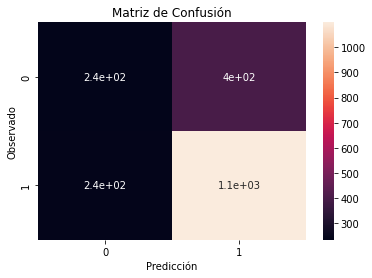

In [58]:
from sklearn import metrics

#matriz de confusión
cm=metrics.confusion_matrix(y_test,y_pred_test) #true,pred


print('Confusion matrix:',cm)

#graficamos la matriz de confusión
sns.heatmap(cm,annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

accuracy=metrics.accuracy_score(y_test,y_pred_test)
print('Accuracy:',accuracy) #(72+37)/120

recall=metrics.recall_score(y_test,y_pred_test)
print('Recall:',recall) #21/32

precision=metrics.precision_score(y_test,y_pred_test)
print('Precision:',precision) #21/25

fscore=metrics.f1_score(y_test,y_pred_test)
print('F score:',fscore)

#también podemos imprimir un resumen de las métricas de clasificación
report0=metrics.classification_report(y_test,y_pred_test)
print(report0)

In [59]:
import sklearn

In [69]:
arbol.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=17)

In [100]:
dec_tree_grid = DecisionTreeClassifier(max_depth = 3, max_features = 20 )
arbol_ = dec_tree_grid.fit(X_train, y_train)
y_pred_test = dec_tree_grid_cv.predict(X_test)

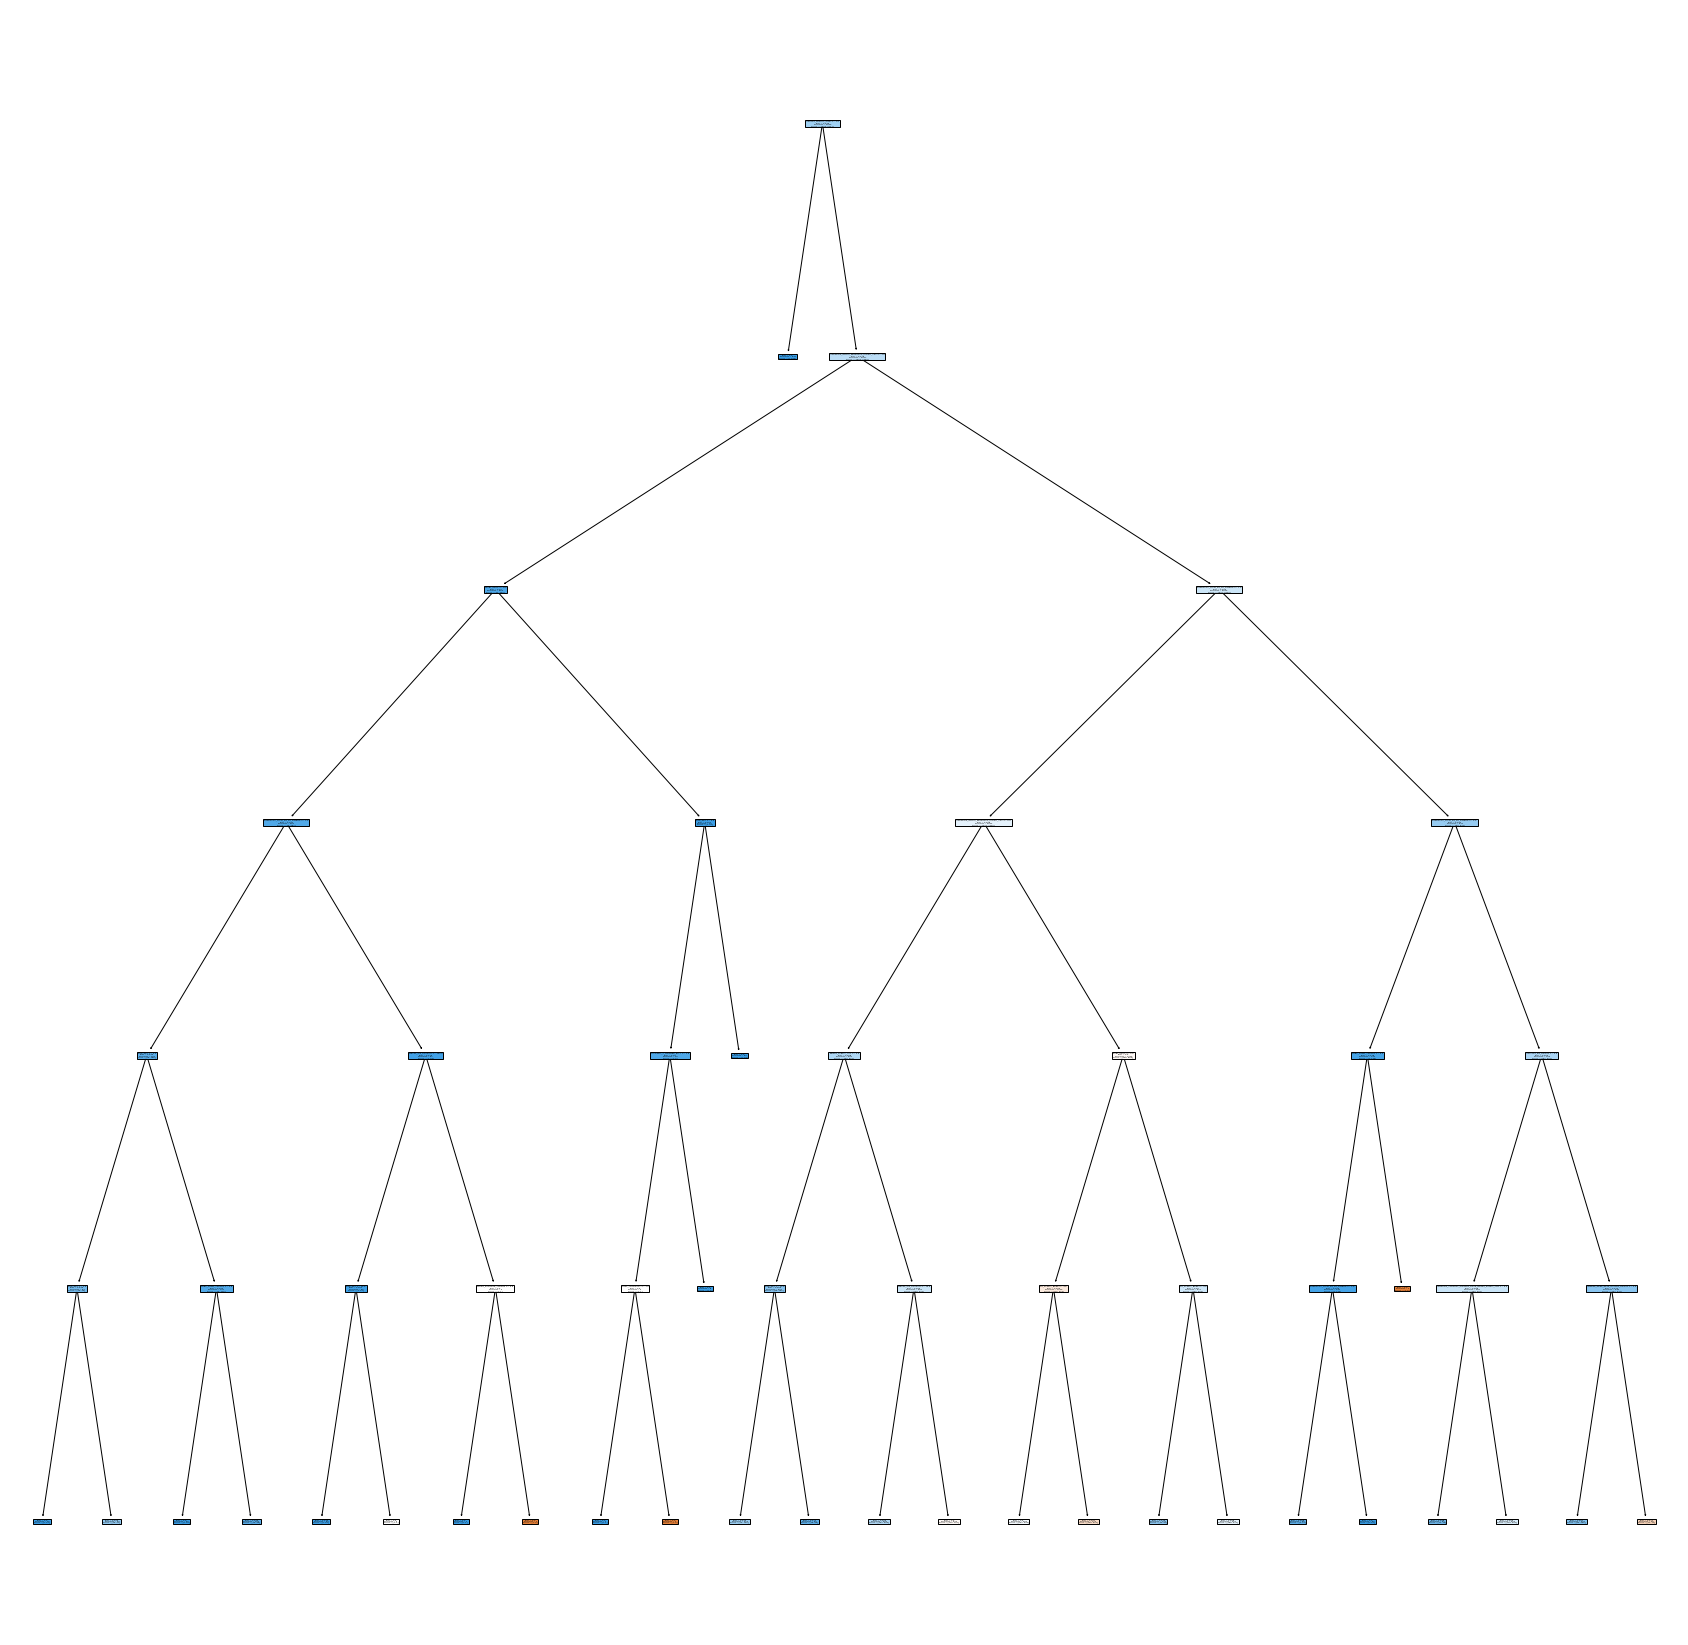

In [92]:
from sklearn import tree

_, ax = plt.subplots(figsize=(30,30)) # Resize figure
tree.plot_tree(arbol_, filled=True, feature_names = X.columns,ax=ax)
plt.show()
# fig = plt.figure(figsize=(30,30))
# tree.plot_tree(arbol_, feature_names = X.columns);



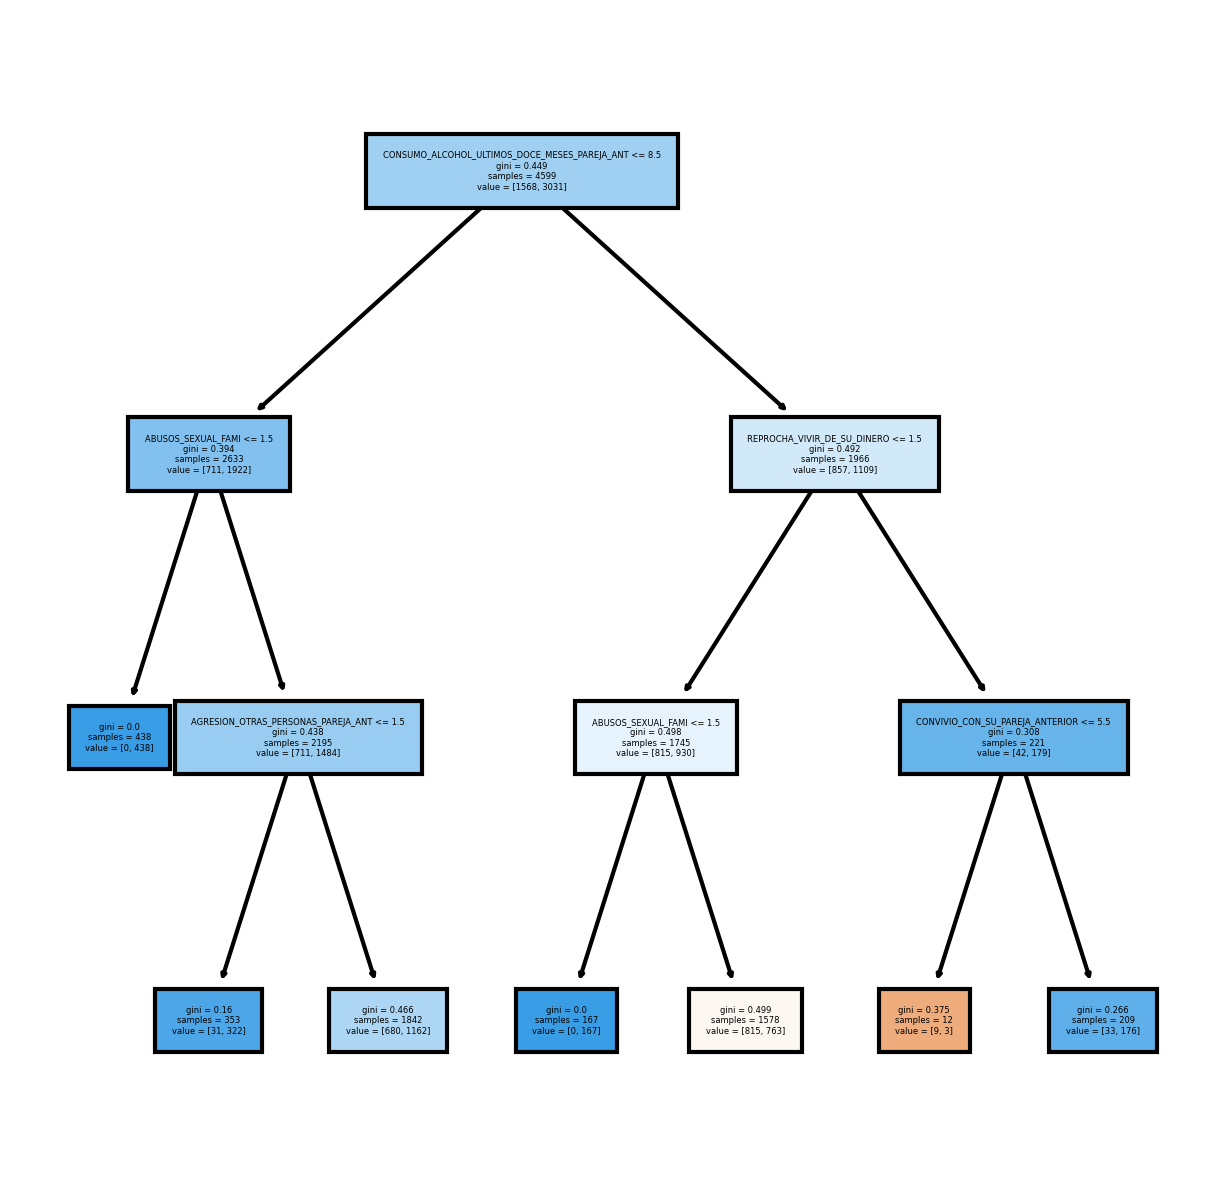

In [113]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(arbol_, filled=True, feature_names = X.columns,fontsize=2);

arbol.best_estimator_

In [68]:
from sklearn.tree import export_graphviz
export_graphviz( 
 arbol.best_estimator_,
 out_file=('moons_tree.dot'),
 feature_names=None,
 class_names=None,
 filled=True,
)